In [1]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from wordcloud import WordCloud

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/drive/MyDrive/mobile app data/googleplaystore.csv")

In [5]:
df.sample(5)

App       Category  Rating Reviews  \
10439    Carpooling FH Hagenberg  COMMUNICATION     NaN       0   
4692            The Grand Bike V         FAMILY     3.8    3478   
2744   Twice: Buy, Sell Clothing       SHOPPING     4.2    1558   
6341     Blackjack Verite Drills           GAME     4.6      17   
5111           Ag Across America         FAMILY     NaN       0   

                     Size    Installs  Type   Price Content Rating  \
10439  Varies with device        100+  Free       0       Everyone   
4692                  95M  1,000,000+  Free       0       Everyone   
2744                  21M    100,000+  Free       0       Everyone   
6341                 4.7M        100+  Paid  $14.00           Teen   
5111                  15M         10+  Free       0       Everyone   

                      Genres       Last Updated         Current Ver  \
10439          Communication       May 18, 2017  Varies with device   
4692              Simulation  February 24, 2018                 4.0   
2744                Shopping      July 29, 2015              1.2.12   
6341                  Casino       July 9, 2017              1.1.10   
5111   Educational;Education       May 15, 2018               1.0.0   

              Android Ver  
10439  Varies with device  
4692           4.1 and up  
2744           2.3 and up  
6341           3.0 and up  
5111           4.1 and up

In [6]:
df.shape

(10841, 13)

In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
df[~df.Reviews.str.isnumeric()]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

In [11]:
df=df.drop(df.index[10472])

In [12]:
df["Reviews"] = df["Reviews"].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [14]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [16]:
###### Convert mega to kilo then convert all to mega
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [18]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [20]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        df[col]=df[col].str.replace(item,'')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type Price Content Rating  \
0      159  19.0     10000  Free     0       Everyone   
1      967  14.0    500000  Free     0       Everyone   
2    87510   8.7   5000000  Free     0       Everyone   
3   215644  25.0  50000000  Free     0           Teen   
4      967   2.8    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [22]:
df[df['Price']=='Everyone']

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [21]:
df.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [23]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.4+ MB


In [24]:
### Change Last update into a datetime column
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [25]:
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [26]:
df.drop('Last Updated', axis=1, inplace=True)

In [27]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

Null Values  Percentage Null Values
Size                   1695               15.636531
Rating                 1474               13.597786
Current Ver               8                0.073801
Android Ver               2                0.018450
Type                      1                0.009225
App                       0                0.000000
Category                  0                0.000000
Reviews                   0                0.000000
Installs                  0                0.000000
Price                     0                0.000000
Content Rating            0                0.000000
Genres                    0                0.000000
Updated_Month             0                0.000000
Updated_Year              0                0.000000

<BarContainer object of 14 artists>

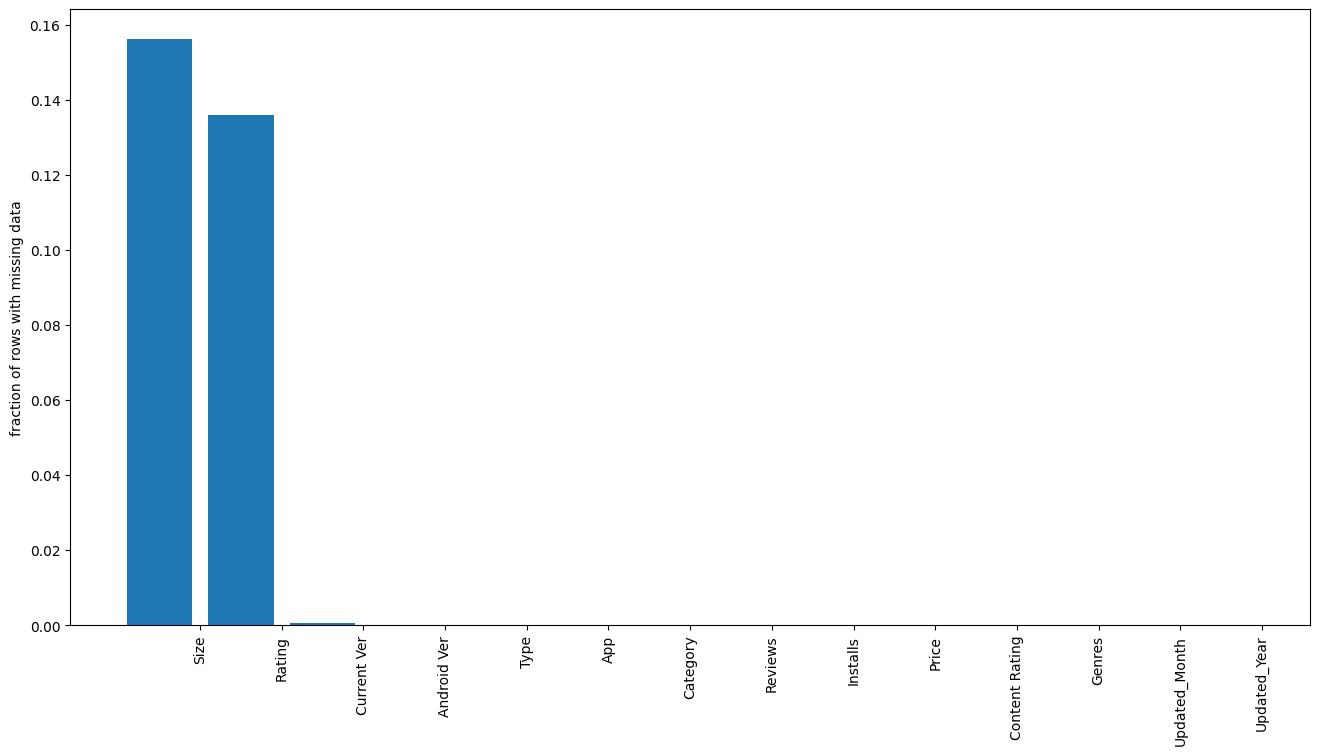

In [28]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [29]:
def impute_median(series):
    return series.fillna(series.median())

df['Rating'] = df['Rating'].transform(impute_median)

In [30]:
def impute_median(series):
    return series.fillna(series.median())

df['Size'] = df['Size'].transform(impute_median)

In [31]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

In [32]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)

In [33]:
duplicate = df.duplicated()
print(duplicate.sum())

484


In [34]:
df.drop_duplicates(inplace=True)

In [35]:
duplicate = df.duplicated()
print(duplicate.sum())

0


In [36]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Month',
 'Updated_Year']

In [37]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

<Axes: ylabel='Rating'>

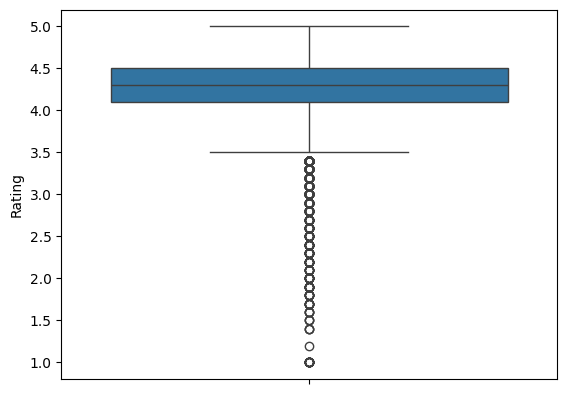

In [39]:
sns.boxplot(df["Rating"])

<Axes: ylabel='Rating'>

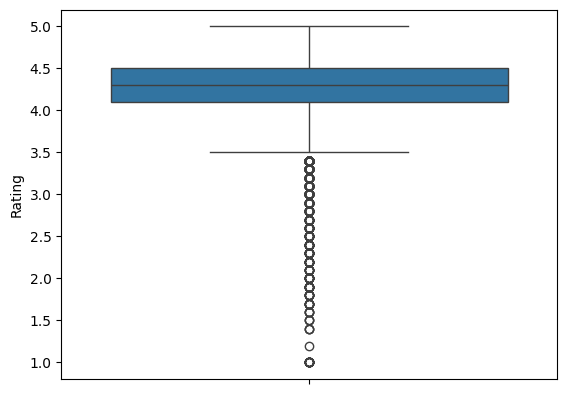

In [40]:
sns.boxplot(df["Rating"])

<Axes: ylabel='Size'>

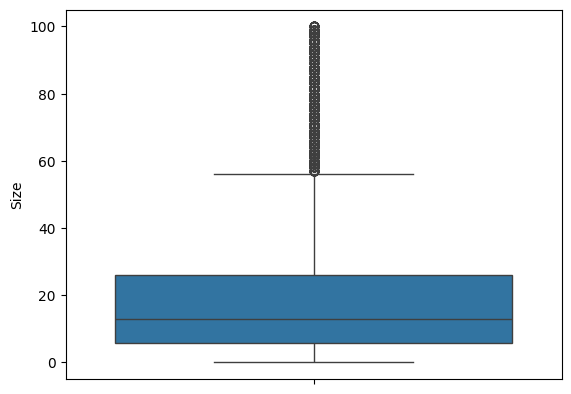

In [41]:
sns.boxplot(df["Size"])

<Axes: ylabel='Installs'>

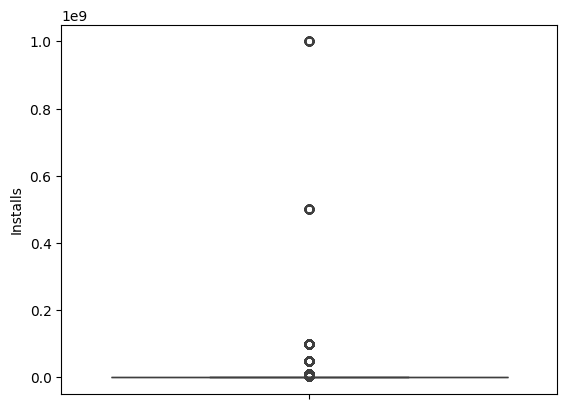

In [42]:
sns.boxplot(df["Installs"])

<Axes: ylabel='Rating'>

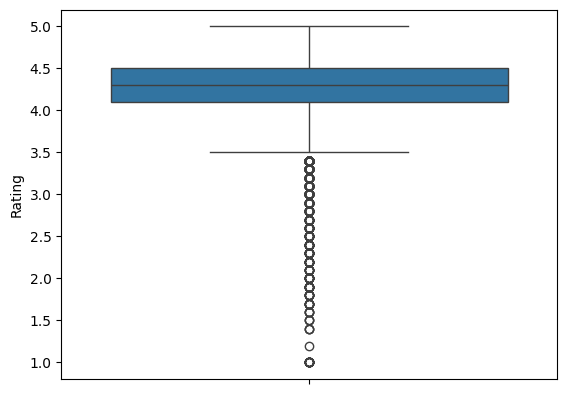

In [43]:
sns.boxplot(df["Rating"])

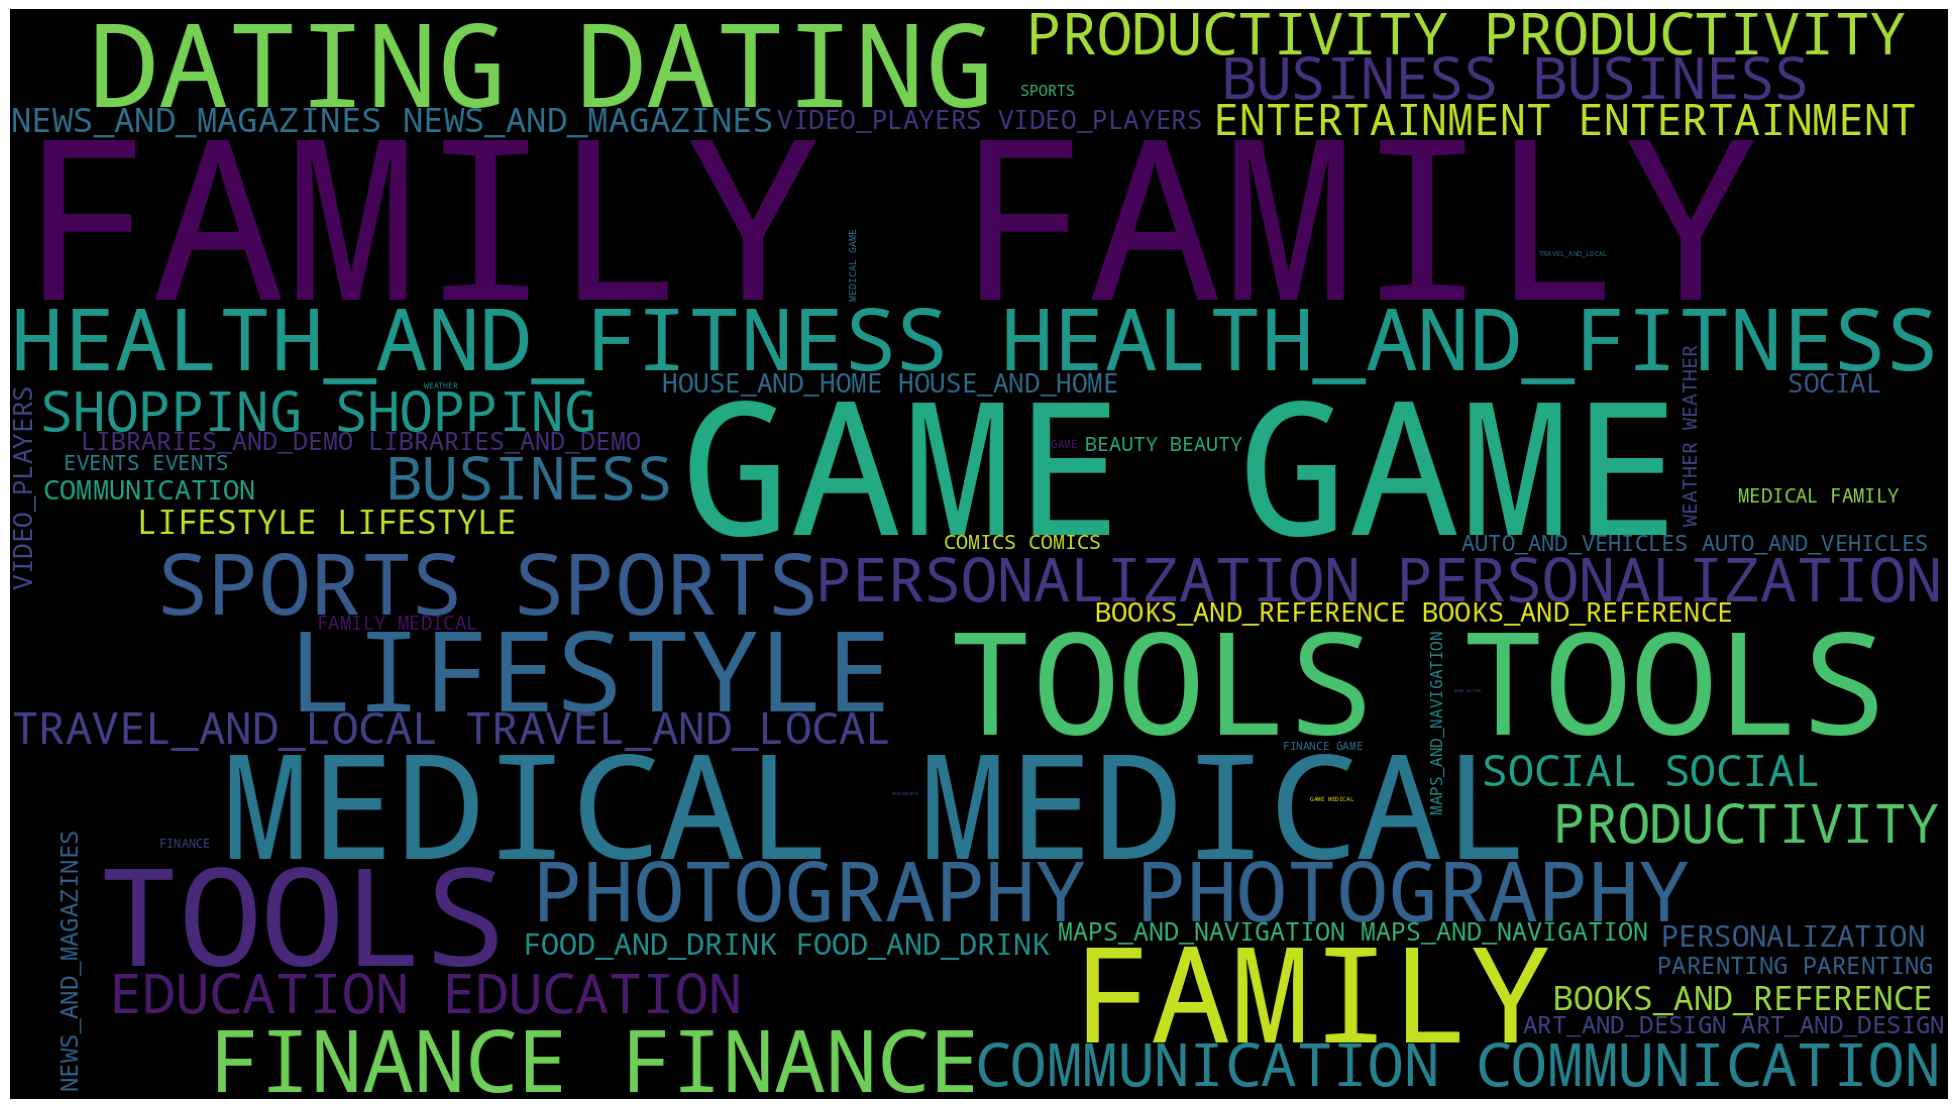

In [44]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'HEALTH_AND_FITNESS'),
  Text(2, 0, 'SHOPPING'),
  Text(3, 0, 'LIFESTYLE'),
  Text(4, 0, 'TOOLS'),
  Text(5, 0, 'COMMUNICATION'),
  Text(6, 0, 'ART_AND_DESIGN'),
  Text(7, 0, 'COMICS'),
  Text(8, 0, 'PERSONALIZATION'),
  Text(9, 0, 'GAME'),
  Text(10, 0, 'MEDICAL'),
  Text(11, 0, 'BUSINESS'),
  Text(12, 0, 'PRODUCTIVITY'),
  Text(13, 0, 'NEWS_AND_MAGAZINES'),
  Text(14, 0, 'FINANCE'),
  Text(15, 0, 'SOCIAL'),
  Text(16, 0, 'PHOTOGRAPHY'),
  Text(17, 0, 'BOOKS_AND_REFERENCE'),
  Text(18, 0, 'SPORTS'),
  Text(19, 0, 'FOOD_AND_DRINK'),
  Text(20, 0, 'PARENTING'),
  Text(21, 0, 'EVENTS'),
  Text(22, 0, 'TRAVEL_AND_LOCAL'),
  Text(23, 0, 'DATING'),
  Text(24, 0, 'LIBRARIES_AND_DEMO'),
  Text(25, 0, 'MAPS_AND_NAVIGATION'),
  Text(26, 0, 'VIDEO_PLAYERS'),
  Text(27, 0, '

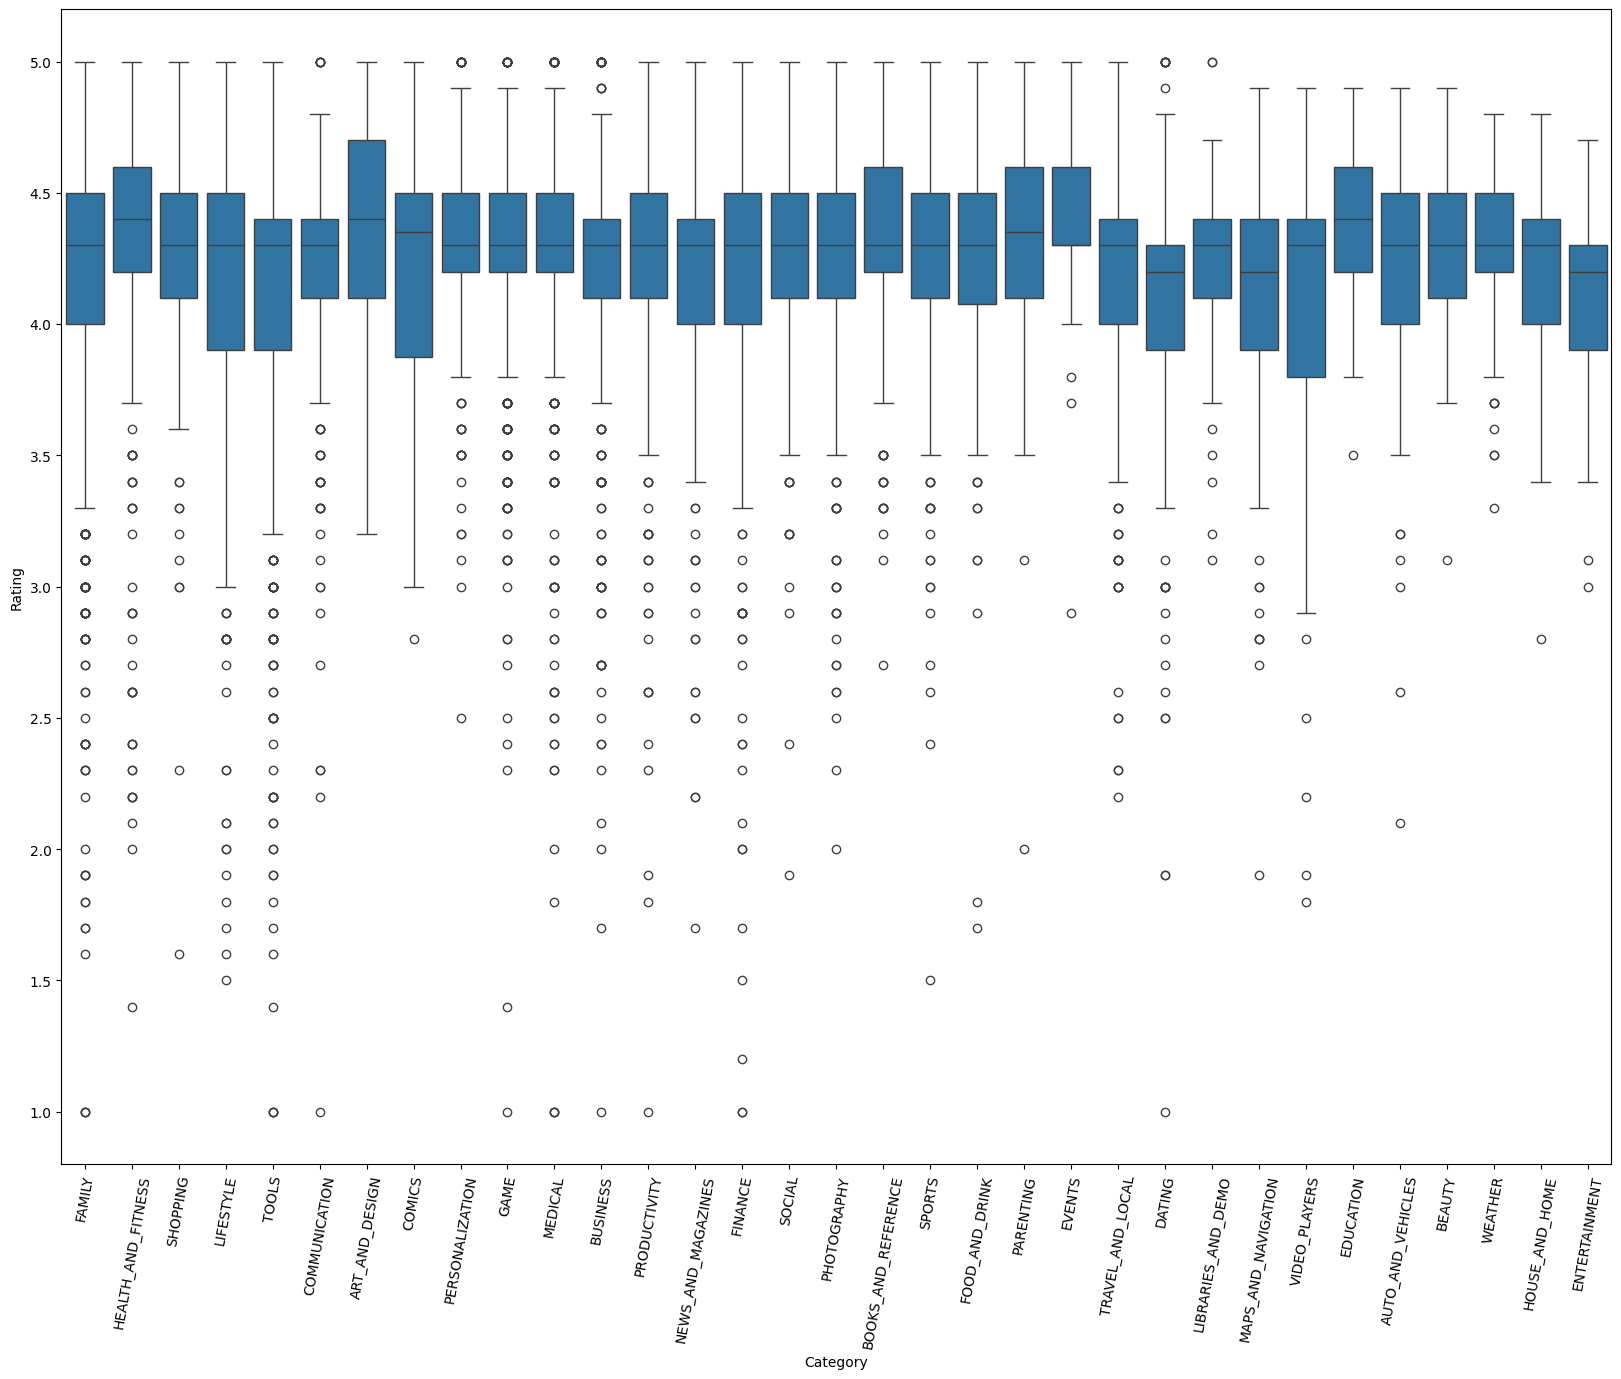

In [45]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=80)

In [46]:
df['Type'].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

<Figure size 1500x800 with 0 Axes>

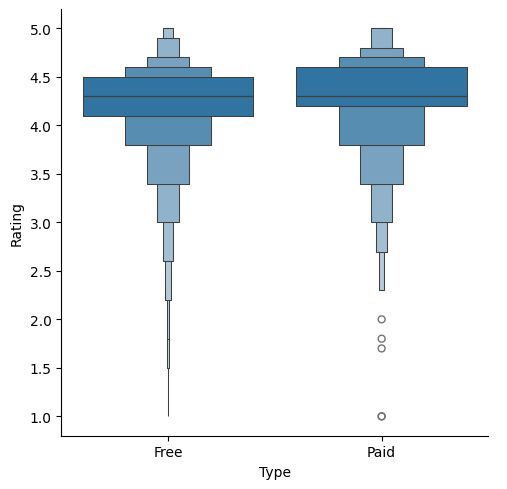

In [48]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = df.sort_values('Rating',ascending=False),kind='boxen')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'HEALTH_AND_FITNESS'),
  Text(2, 0, 'SHOPPING'),
  Text(3, 0, 'LIFESTYLE'),
  Text(4, 0, 'TOOLS'),
  Text(5, 0, 'COMMUNICATION'),
  Text(6, 0, 'ART_AND_DESIGN'),
  Text(7, 0, 'COMICS'),
  Text(8, 0, 'PERSONALIZATION'),
  Text(9, 0, 'GAME'),
  Text(10, 0, 'MEDICAL'),
  Text(11, 0, 'BUSINESS'),
  Text(12, 0, 'PRODUCTIVITY'),
  Text(13, 0, 'NEWS_AND_MAGAZINES'),
  Text(14, 0, 'FINANCE'),
  Text(15, 0, 'SOCIAL'),
  Text(16, 0, 'PHOTOGRAPHY'),
  Text(17, 0, 'BOOKS_AND_REFERENCE'),
  Text(18, 0, 'SPORTS'),
  Text(19, 0, 'FOOD_AND_DRINK'),
  Text(20, 0, 'PARENTING'),
  Text(21, 0, 'EVENTS'),
  Text(22, 0, 'TRAVEL_AND_LOCAL'),
  Text(23, 0, 'DATING'),
  Text(24, 0, 'LIBRARIES_AND_DEMO'),
  Text(25, 0, 'MAPS_AND_NAVIGATION'),
  Text(26, 0, 'VIDEO_PLAYERS'),
  Text(27, 0, '

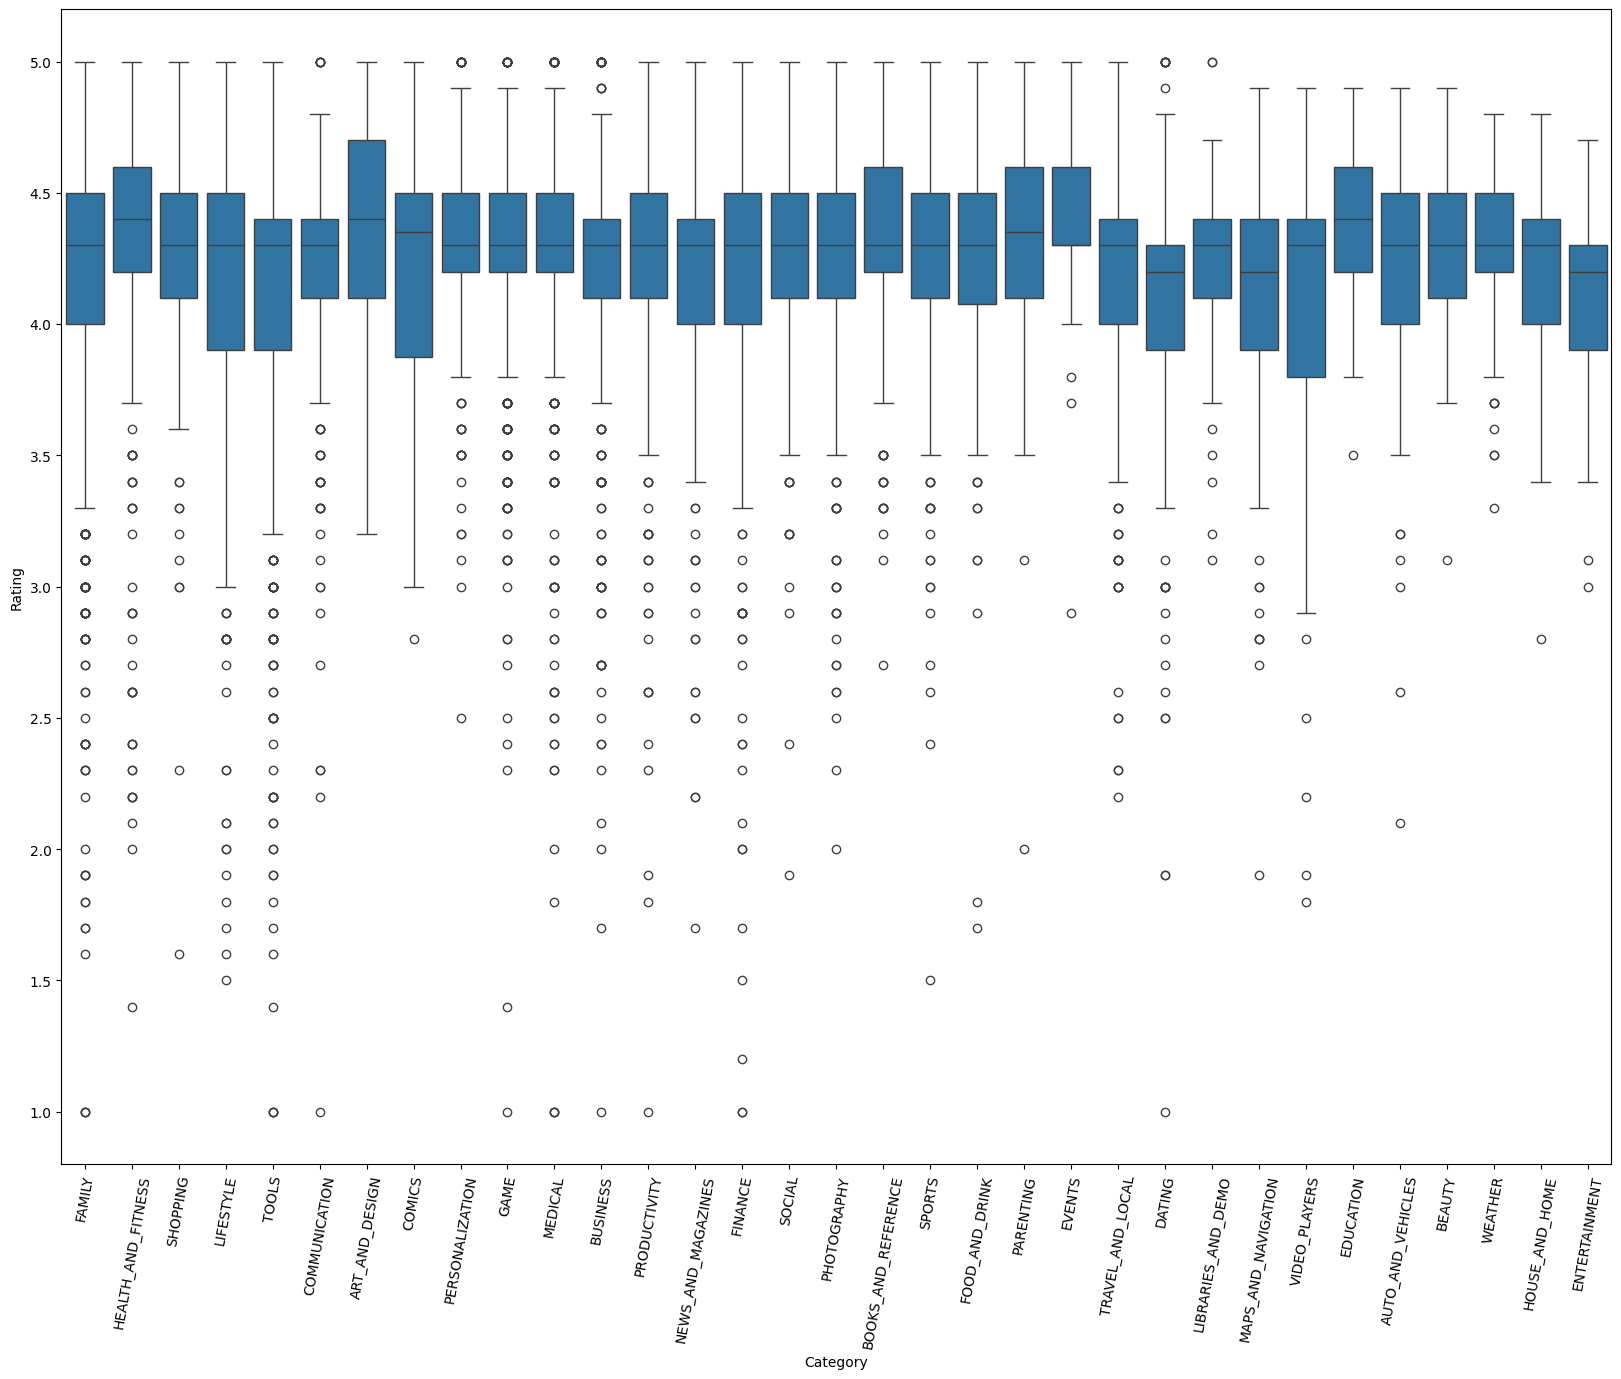

In [49]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=80)

In [50]:
df['Type'].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

([0, 1], [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

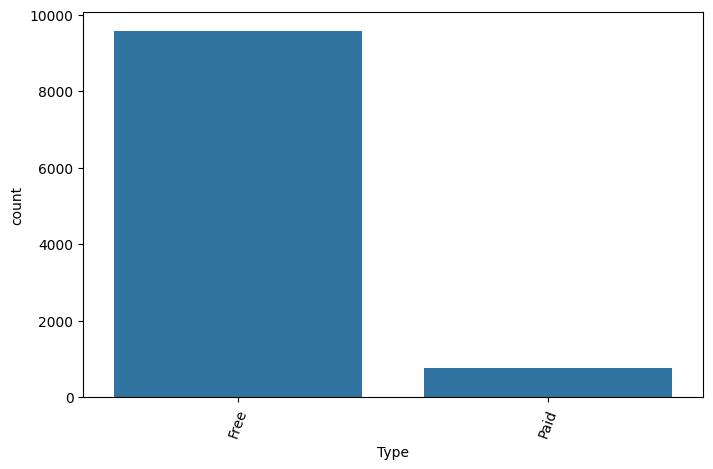

In [51]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=df)
plt.xticks(rotation=70)

<Axes: ylabel='count'>

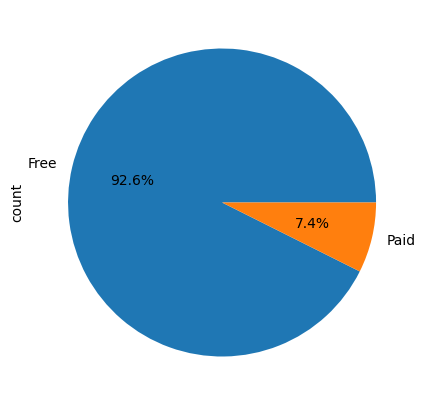

In [52]:
df["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

In [53]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8381
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Mature 17+'),
  Text(3, 0, 'Everyone 10+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

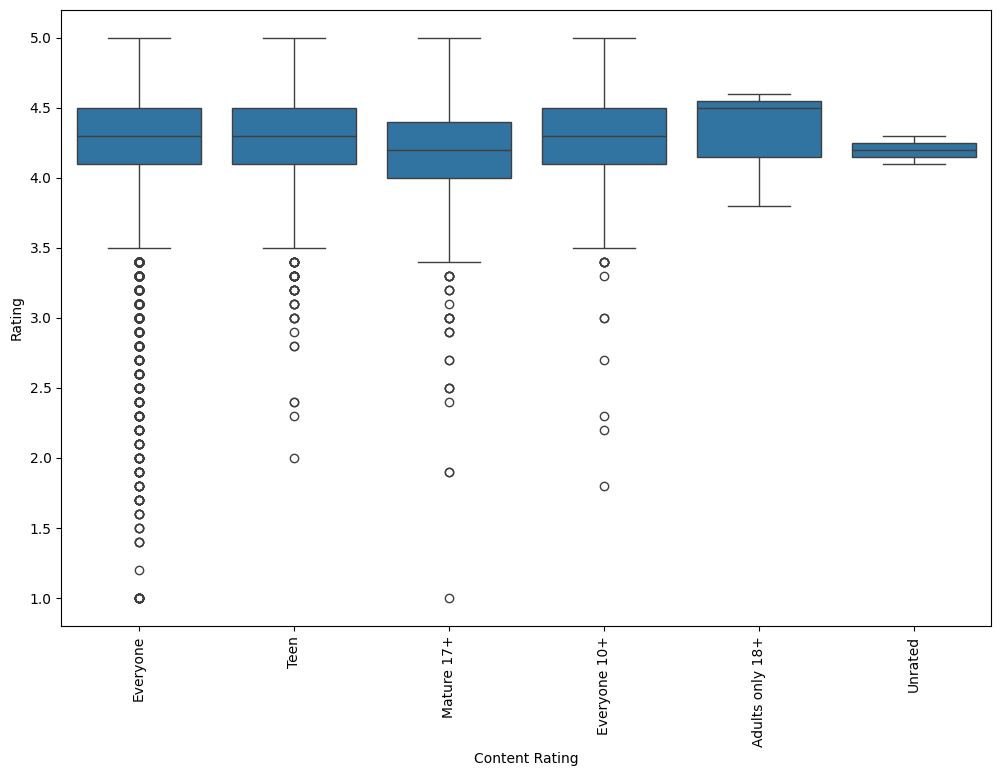

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

<Axes: xlabel='Content Rating', ylabel='Installs'>

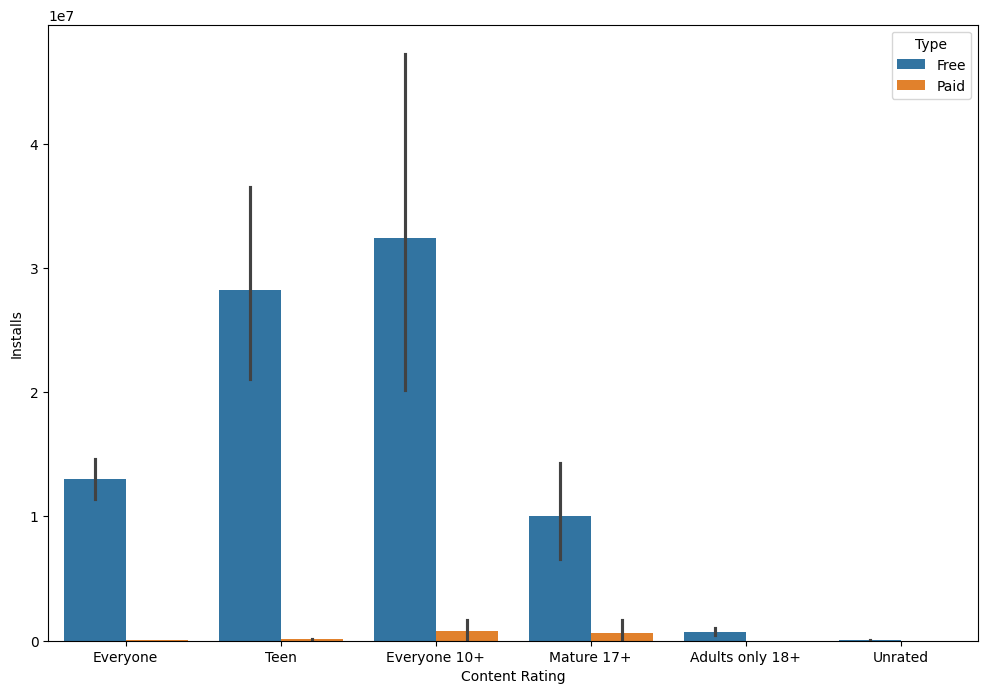

In [55]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=df)

In [56]:
df['Genres'].value_counts()

Genres
Tools                                841
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

In [57]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1302
1.0                    802
1.1                    260
1.2                    177
2.0                    149
                      ... 
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
7.1.34.28                1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

In [58]:
df['Android Ver'].value_counts()

Android Ver
4.1 and up            2379
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             893
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [59]:
# Function to create a scatter plot
def scatters(col1, col2):
    # Create a scatter plot using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=df, x=col1, y=col2, hue="Type")
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Function to create a KDE plot
def kde_plot(feature):
    # Create a FacetGrid for KDE plots using Seaborn
    grid = sns.FacetGrid(df, hue="Type", aspect=2)

    # Map KDE plots for the specified feature
    grid.map(sns.kdeplot, feature)

    # Add a legend to distinguish between categories
    grid.add_legend()


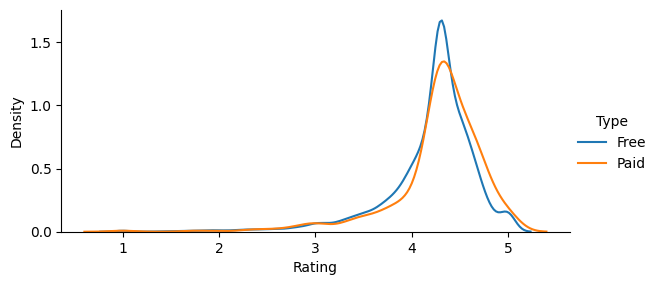

In [60]:
kde_plot('Rating')

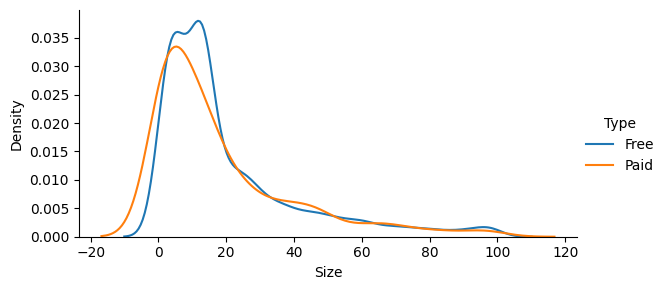

In [61]:
kde_plot('Size')

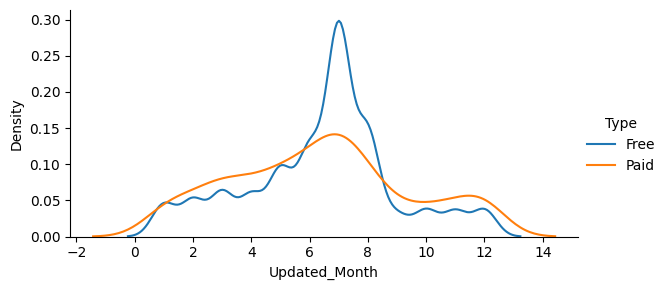

In [62]:
kde_plot('Updated_Month')

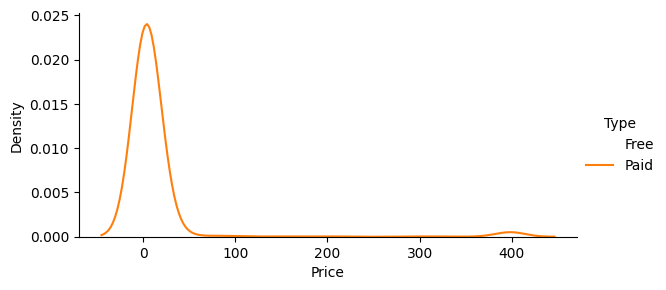

In [63]:
kde_plot('Price')

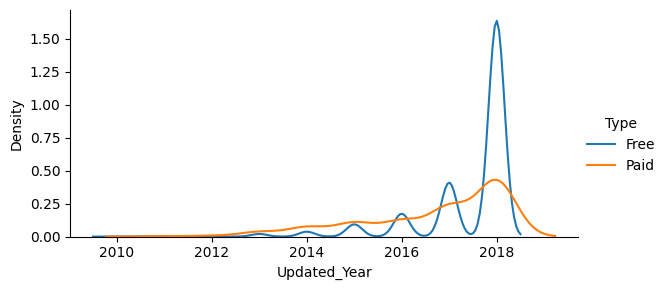

In [64]:
kde_plot('Updated_Year')

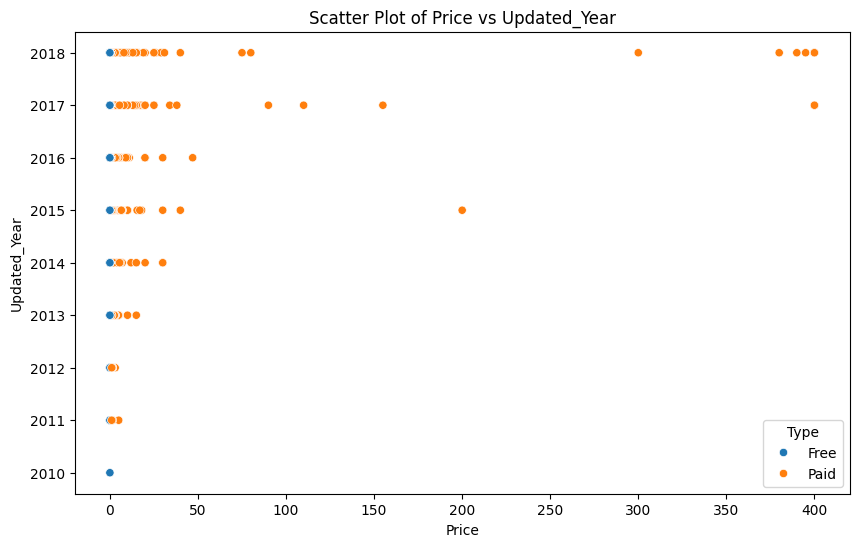

In [65]:
scatters('Price', 'Updated_Year')

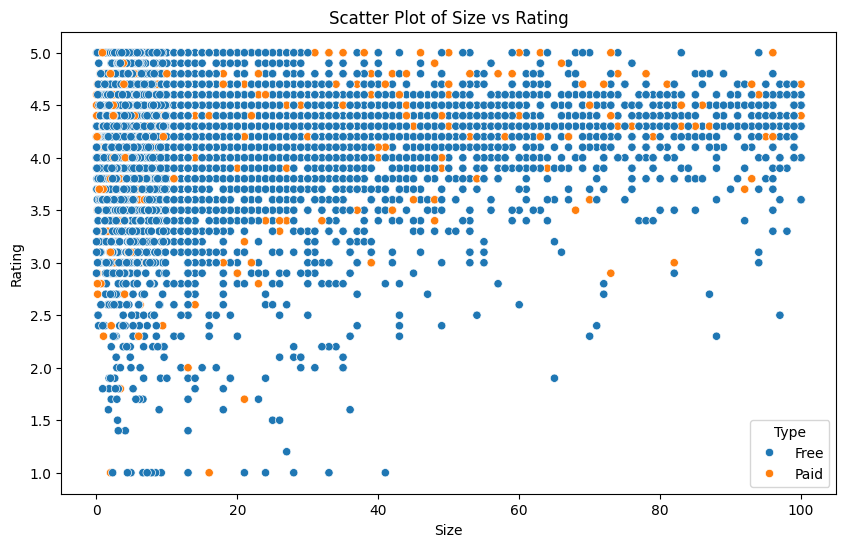

In [66]:
scatters('Size', 'Rating')

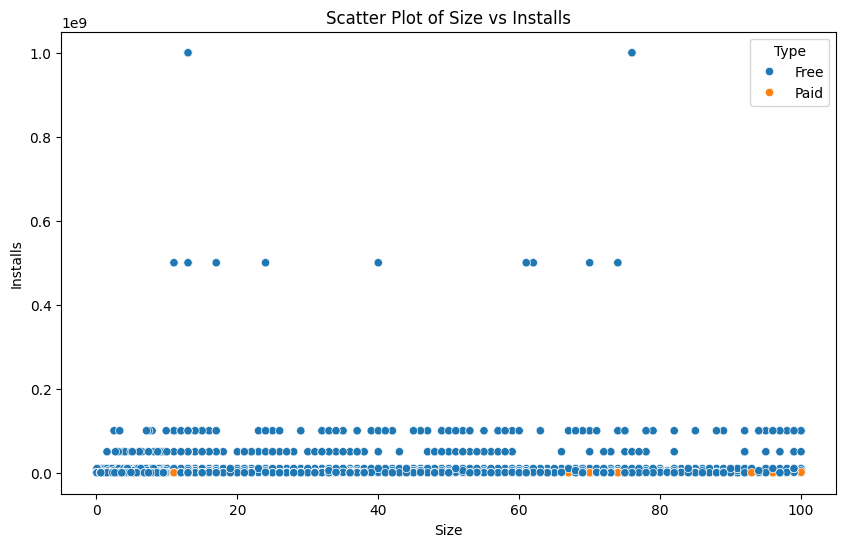

In [67]:
scatters('Size', 'Installs')

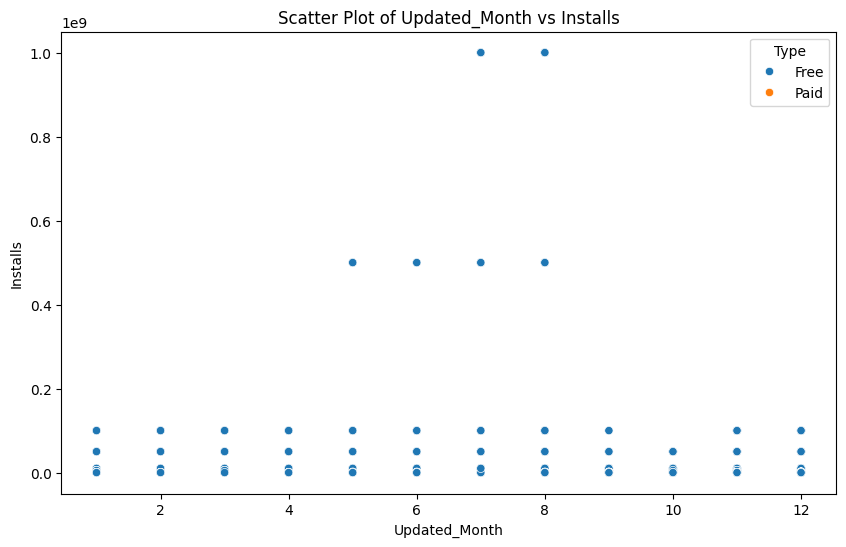

In [68]:
scatters('Updated_Month', 'Installs')

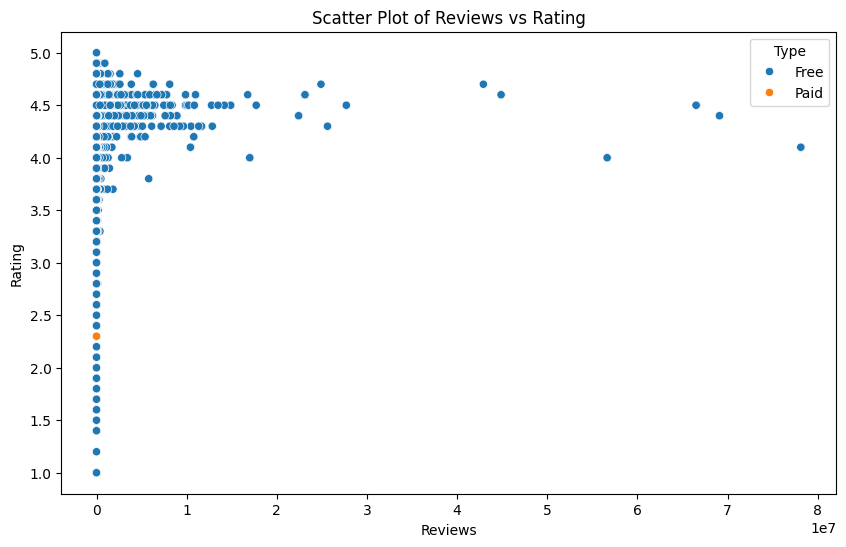

In [69]:
scatters('Reviews', 'Rating')

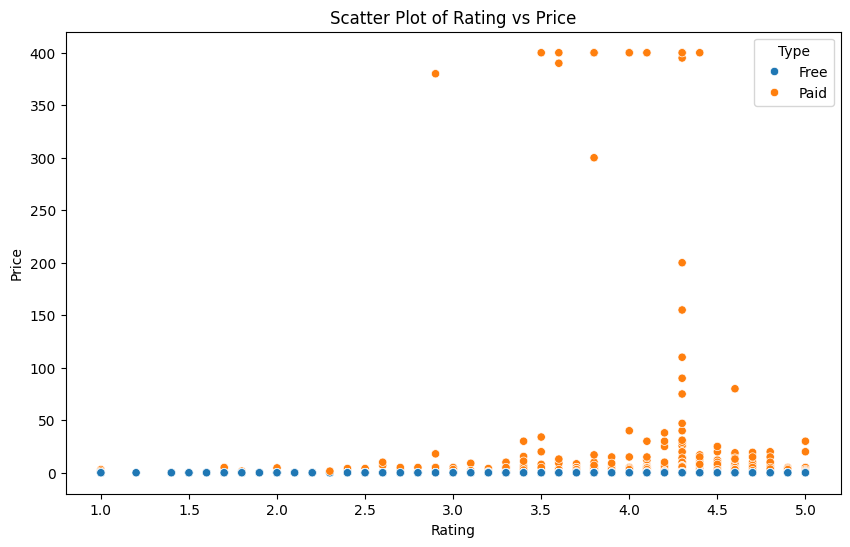

In [70]:
scatters('Rating', 'Price')

In [71]:
df_rating_5 = df[df.Rating == 5.]
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')

There are 271 apps having rating of 5.0


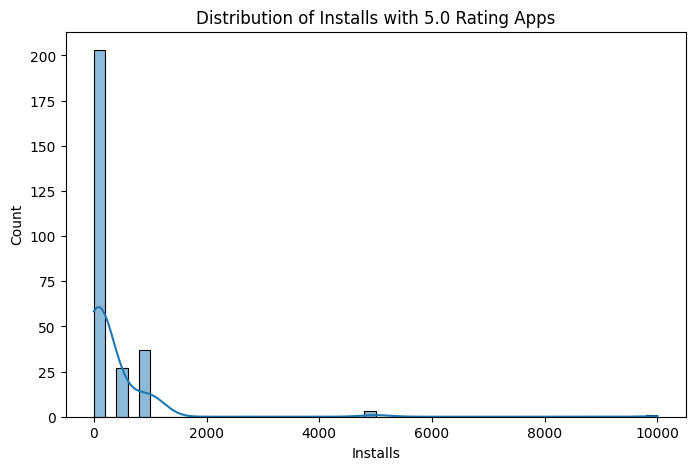

In [72]:
sns.histplot(data=df_rating_5, x='Installs', kde=True, bins=50)

plt.title('Distribution of Installs with 5.0 Rating Apps')
plt.show()

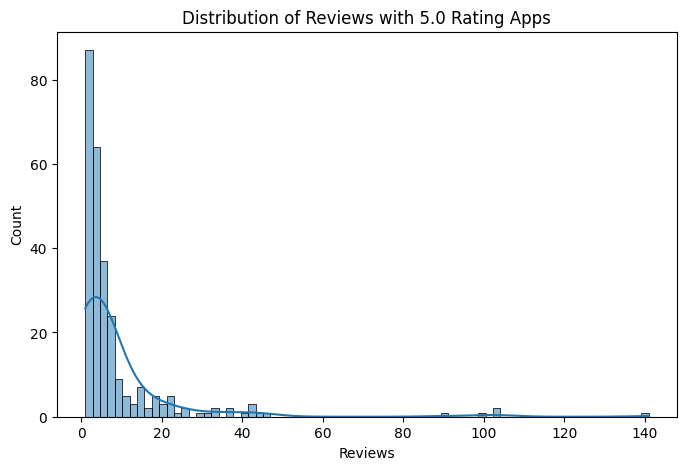

In [73]:
sns.histplot(data=df_rating_5, x='Reviews', kde=True)
plt.title('Distribution of Reviews with 5.0 Rating Apps')
plt.show()

In [74]:
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()

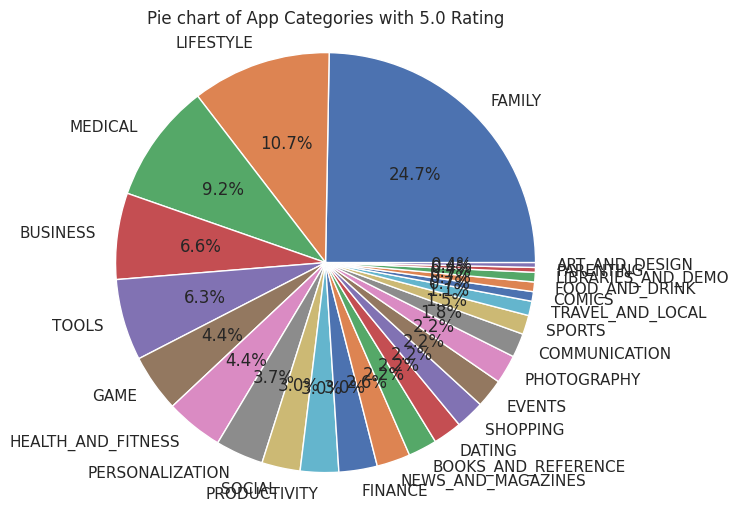

In [75]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.pie(df_rating_5_cat.iloc[:, 1], labels=df_rating_5_cat.iloc[:, 0], autopct='%1.1f%%')
plt.title('Pie chart of App Categories with 5.0 Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [76]:
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()

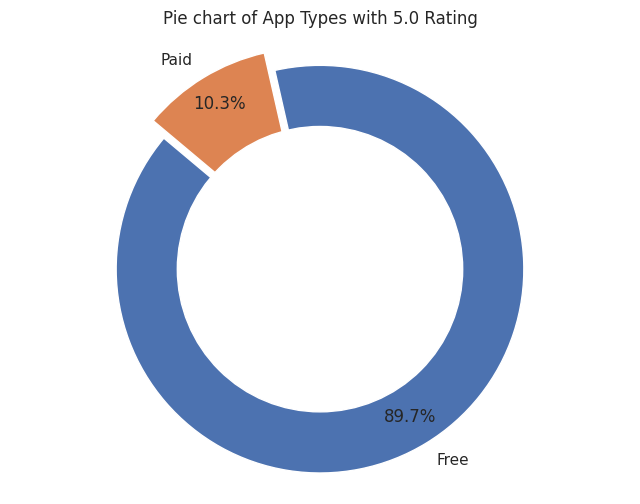

In [77]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Data for the pie chart
sizes = df_rating_5_type.iloc[:, 1]
labels = df_rating_5_type.iloc[:, 0]

# Pull a slice out by exploding it
explode = (0, 0.1)  # Adjust the second value to control the pull-out distance

# Create the pie chart with default colors
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Pie chart of App Types with 5.0 Rating')

# Show the pie chart
plt.show()


Text(0.5, 1.0, 'Time series plot of Last Updates')

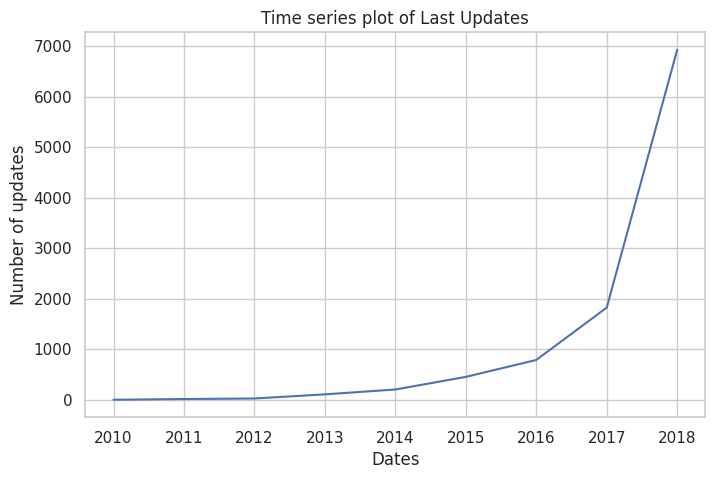

In [78]:
freq= pd.Series()
freq=df['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

In [79]:
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver']

In [80]:
target = 'Rating'

In [81]:
X = df.copy().drop(pruned_features+[target], axis=1)
y = df.copy()[target]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [83]:
le_dict = defaultdict()

In [84]:
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    X_test[col] = le.transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    le_dict[col] = le # Saving the label encoder for individual features

In [85]:
# Converting and adding "Last Updated Month" to categorical features
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listing numeric features to scale
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [86]:
numeric_features

Index(['Reviews', 'Size', 'Installs', 'Price', 'Updated_Year'], dtype='object')

In [87]:
scaler = StandardScaler()

# Fitting and transforming the Training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

In [88]:
models = ['Linear', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [89]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN

In [90]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [91]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)

In [92]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

In [93]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [94]:
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test)

In [95]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

In [96]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [97]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)

In [98]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

In [99]:
df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.478
                      MAE     0.319
                      R2      0.023
              test    RMSE    0.483
                      MAE     0.327
                      R2      0.037
KNN           train   RMSE    0.409
                      MAE     0.280
                      R2      0.286
              test    RMSE    0.510
                      MAE     0.349
                      R2     -0.072
Random Forest train   RMSE    0.468
                      MAE     0.309
                      R2      0.063
              test    RMSE    0.472
                      MAE     0.314
                      R2      0.081

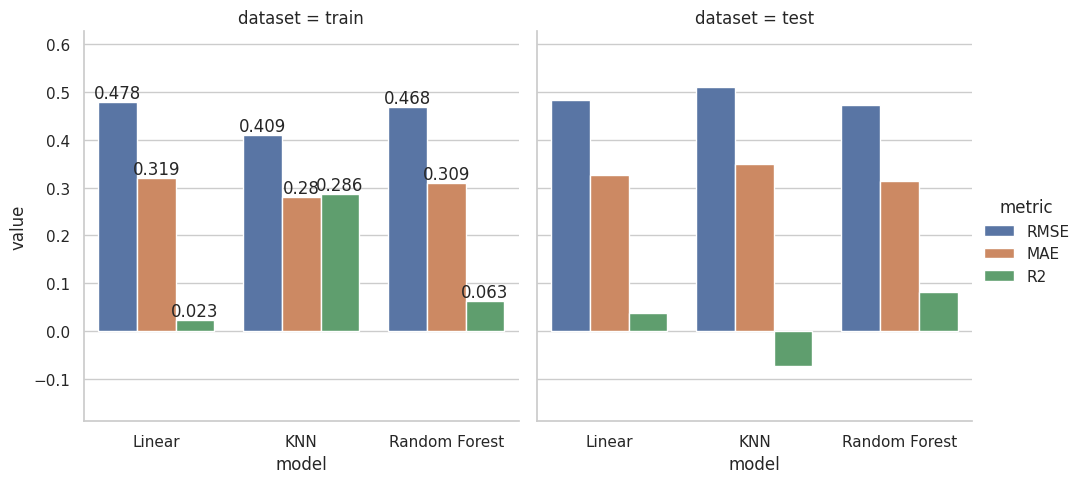

In [101]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)
    plt.show()

In [102]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [103]:
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']

multi_index = pd.MultiIndex.from_product([models, datasets],
                                         names=['model', 'dataset'])

df_metrics_clf = pd.DataFrame(index=multi_index,
                          columns=['accuracy %'])

In [104]:
df_metrics_clf

accuracy %
model               dataset           
Logistic Regression train          NaN
                    test           NaN
KNN                 train          NaN
                    test           NaN
Random Forest       train          NaN
                    test           NaN

In [105]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train_int)

LogisticRegression()

In [106]:
df_metrics_clf.loc['Logistic Regression', 'train'] = lr_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Logistic Regression', 'test'] = lr_clf.score(X_test, y_test_int)

In [107]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)

KNeighborsClassifier()

In [108]:
df_metrics_clf.loc['KNN', 'train'] = knn_clf.score(X_train, y_train_int)
df_metrics_clf.loc['KNN', 'test'] = knn_clf.score(X_test, y_test_int)

In [109]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_int)

RandomForestClassifier()

In [110]:
df_metrics_clf.loc['Random Forest', 'train'] = rf_clf.score(X_train, y_train_int)
df_metrics_clf.loc['Random Forest', 'test'] = rf_clf.score(X_test, y_test_int)

In [111]:
# Rounding and coverting the accuracies to percentages
df_metrics_clf['accuracy %'] = df_metrics_clf['accuracy %'].apply(lambda v: round(v*100, ndigits=2))
df_metrics_clf

accuracy %
model               dataset            
Logistic Regression train         78.96
                    test          76.93
KNN                 train         80.98
                    test          74.52
Random Forest       train        100.00
                    test          77.99

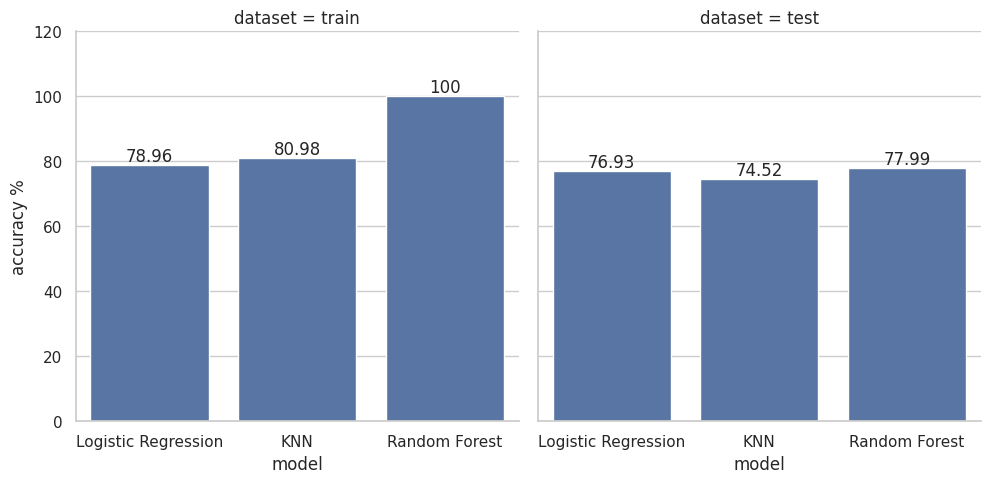

In [112]:
data = df_metrics_clf.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='accuracy %')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()

AppleStore

In [113]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# show all columns
pd.set_option('display.max_columns', None)

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

#nlp processing
import re, string
import spacy
from spacy.matcher import PhraseMatcher

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

#pre-processiong
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier

In [114]:
# load data and merge the 'app_desc' column intp the AppleStore dataframe
whole_data=pd.read_csv('/content/drive/MyDrive/mobile app data/AppleStore.csv',index_col=0)
desc_data=pd.read_csv('/content/drive/MyDrive/mobile app data/appleStore_description.csv')
desc_data.drop(['track_name','size_bytes'],axis=1,inplace=True)
whole_data=whole_data.merge(desc_data,how='inner',on='id',).reset_index(drop=True)
id_keep=whole_data.pop('id')

In [115]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7197 non-null   object 
 1   size_bytes        7197 non-null   int64  
 2   currency          7197 non-null   object 
 3   price             7197 non-null   float64
 4   rating_count_tot  7197 non-null   int64  
 5   rating_count_ver  7197 non-null   int64  
 6   user_rating       7197 non-null   float64
 7   user_rating_ver   7197 non-null   float64
 8   ver               7197 non-null   object 
 9   cont_rating       7197 non-null   object 
 10  prime_genre       7197 non-null   object 
 11  sup_devices.num   7197 non-null   int64  
 12  ipadSc_urls.num   7197 non-null   int64  
 13  lang.num          7197 non-null   int64  
 14  vpp_lic           7197 non-null   int64  
 15  app_desc          7197 non-null   object 
dtypes: float64(3), int64(7), object(6)
memory 

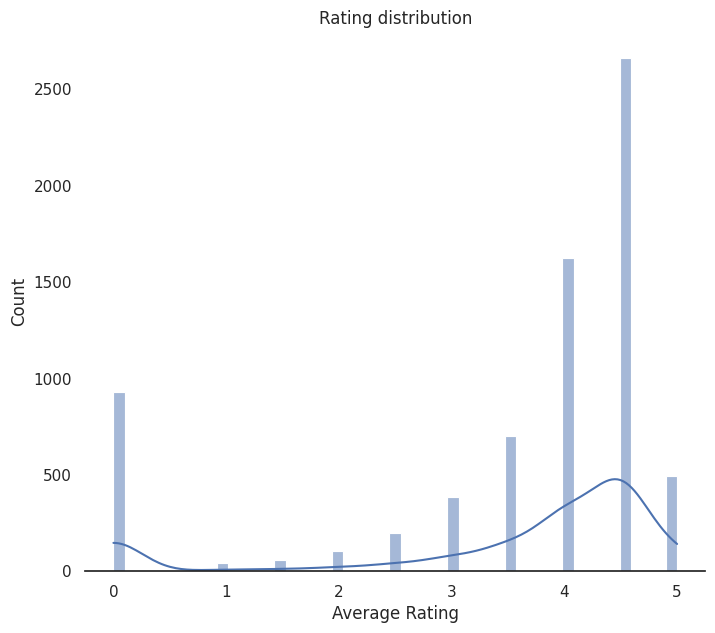

In [116]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution
sns.histplot(whole_data['user_rating'], color="b",kde=True);
ax.xaxis.grid(False) # False: remove grid along y-axis
ax.set(ylabel="Count")
ax.set(xlabel="Average Rating")
ax.set(title="Rating distribution")
sns.despine(left=True) # Do not show the left axis when left=True
plt.show()


In [117]:
# Skewness and kurtosis
print("Skewness: %f" % whole_data['user_rating'].skew()) #normal distribution is expected to have 0 as skewness
print("Kurtosis: %f" % whole_data['user_rating'].kurt()) #normal distribution is expected to have 3 as kurtosis

Skewness: -1.525420
Kurtosis: 0.983266


In [118]:
whole_data.head()

track_name  size_bytes currency  \
0                                    PAC-MAN Premium   100788224      USD   
1                          Evernote - stay organized   158578688      USD   
2    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032      USD   
3  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000      USD   
4                                              Bible    92774400      USD   

   price  rating_count_tot  rating_count_ver  user_rating  user_rating_ver  \
0   3.99             21292                26          4.0              4.5   
1   0.00            161065                26          4.0              3.5   
2   0.00            188583              2822          3.5              4.5   
3   0.00            262241               649          4.0              4.5   
4   0.00            985920              5320          4.5              5.0   

      ver cont_rating   prime_genre  sup_devices.num  ipadSc_urls.num  \
0   6.3.5          4+         Games               38                5   
1   8.2.2          4+  Productivity               37                5   
2   5.0.0          4+       Weather               37                5   
3  5.10.0         12+      Shopping               37                5   
4   7.5.1          4+     Reference               37                5   

   lang.num  vpp_lic                                           app_desc  
0        10        1  SAVE 20%, now only $3.99 for a limited time!\n...  
1        23        1  Let Evernote change the way you organize your ...  
2         3        1  Download the most popular free weather app pow...  
3         9        1  The eBay app is the best way to find anything ...  
4        45        1  On more than 250 million devices around the wo...

In [120]:
paid_data=whole_data.loc[whole_data['price']>0,:].sort_values(by=['price'],ascending=False).reset_index(drop=True)
free_data=whole_data.loc[whole_data['price']==0,:].reset_index(drop=True)
print("There are {} paid apps, taking the propotion of {}%.". format(paid_data.shape[0],round((paid_data.shape[0]/whole_data.shape[0])*100,2)))
print("There are {} free apps, taking the propotion of {}%.". format(free_data.shape[0],round((free_data.shape[0]/whole_data.shape[0])*100,2)))

There are 3141 paid apps, taking the propotion of 43.64%.
There are 4056 free apps, taking the propotion of 56.36%.


Text(0.5, 1.0, 'average user rating for free apps')

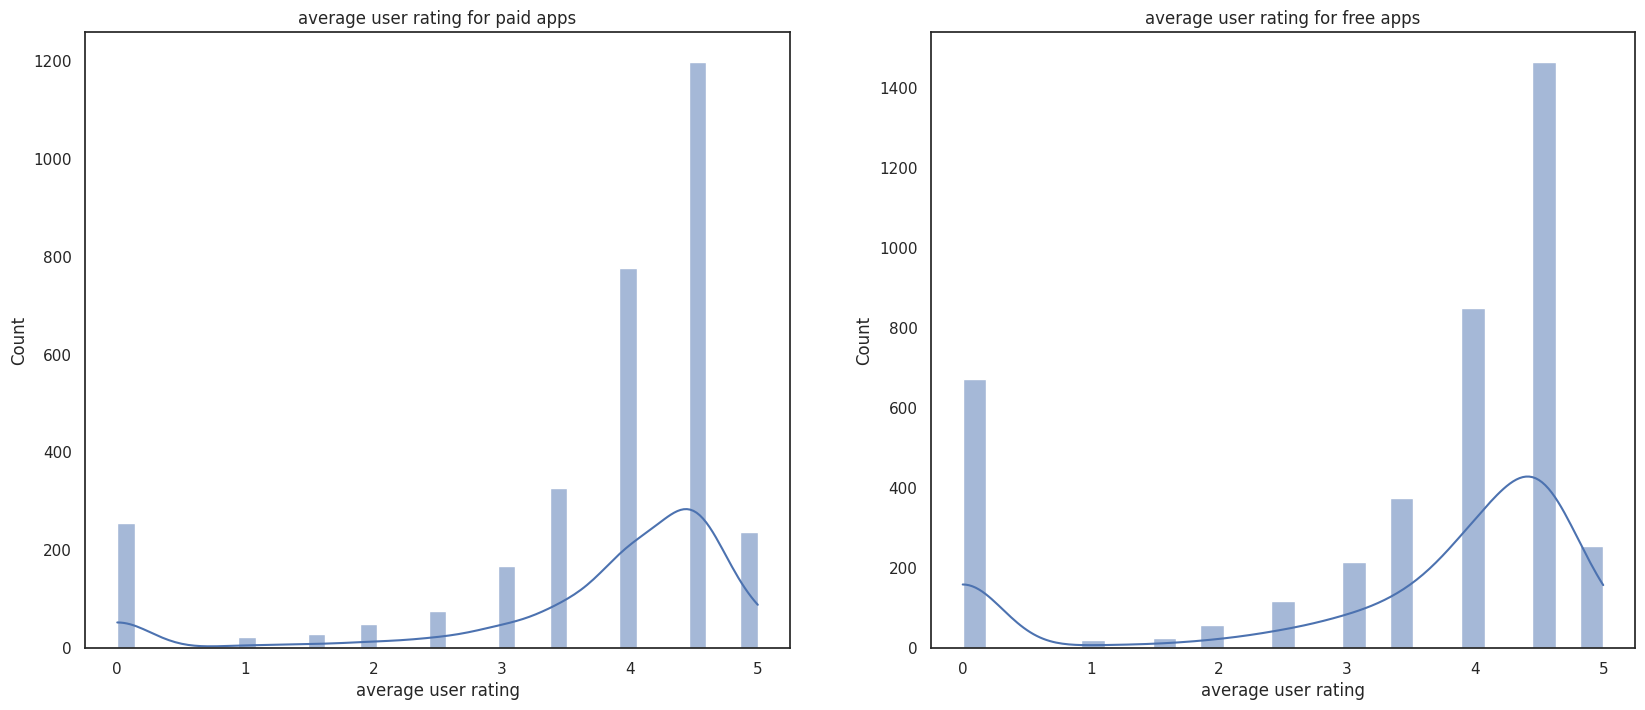

In [121]:
# Draw two histgrams to show differences of rating between paid and free apps.
fig, axes = plt.subplots(1,2,figsize=(20, 8))
for data,ax in zip([paid_data,free_data],axes):
    sns.histplot(data['user_rating'], color="b",kde=True,ax=ax)
    ax.set_xlabel("average user rating")
axes[0].set_title("average user rating for paid apps")
axes[1].set_title("average user rating for free apps")

In [122]:
# Calculate the ratio of each section of ratings for paid and free apps (e.g. the proportion of rating 0-1 in paid and free apps)
def generate_rating_dum(dfs):
    for data in dfs:
        data['rating01']=data['user_rating'].apply(lambda x: 1 if x>=0 and x<=1 else 0)
        data['rating12']=data['user_rating'].apply(lambda x: 1 if x>1 and x<=2 else 0)
        data['rating23']=data['user_rating'].apply(lambda x: 1 if x>2 and x<=3 else 0)
        data['rating34']=data['user_rating'].apply(lambda x: 1 if x>3 and x<=4 else 0)
        data['rating45']=data['user_rating'].apply(lambda x: 1 if x>4 and x<=5 else 0)

generate_rating_dum(dfs=[paid_data,free_data])
print('#'*50)
print('The ratio of ratings 0-1 for paid apps is {}%'.format(round((paid_data.rating01.sum()/paid_data.shape[0])*100,2)))
print('The ratio of ratings 1-2 for paid apps is {}%'.format(round((paid_data.rating12.sum()/paid_data.shape[0])*100,2)))
print('The ratio of ratings 2-3 for paid apps is {}%'.format(round((paid_data.rating23.sum()/paid_data.shape[0])*100,2)))
print('The ratio of ratings 3-4 for paid apps is {}%'.format(round((paid_data.rating34.sum()/paid_data.shape[0])*100,2)))
print('The ratio of ratings 4-5 for paid apps is {}%'.format(round((paid_data.rating45.sum()/paid_data.shape[0])*100,2)))
print('#'*50)
print('The ratio of ratings 0-1 for free apps is {}%'.format(round((free_data.rating01.sum()/free_data.shape[0])*100,2)))
print('The ratio of ratings 1-2 for free apps is {}%'.format(round((free_data.rating12.sum()/free_data.shape[0])*100,2)))
print('The ratio of ratings 2-3 for free apps is {}%'.format(round((free_data.rating23.sum()/free_data.shape[0])*100,2)))
print('The ratio of ratings 3-4 for free apps is {}%'.format(round((free_data.rating34.sum()/free_data.shape[0])*100,2)))
print('The ratio of ratings 4-5 for free apps is {}%'.format(round((free_data.rating45.sum()/free_data.shape[0])*100,2)))

##################################################
The ratio of ratings 0-1 for paid apps is 8.88%
The ratio of ratings 1-2 for paid apps is 2.52%
The ratio of ratings 2-3 for paid apps is 7.77%
The ratio of ratings 3-4 for paid apps is 35.15%
The ratio of ratings 4-5 for paid apps is 45.69%
##################################################
The ratio of ratings 0-1 for free apps is 17.11%
The ratio of ratings 1-2 for free apps is 2.05%
The ratio of ratings 2-3 for free apps is 8.26%
The ratio of ratings 3-4 for free apps is 30.18%
The ratio of ratings 4-5 for free apps is 42.41%


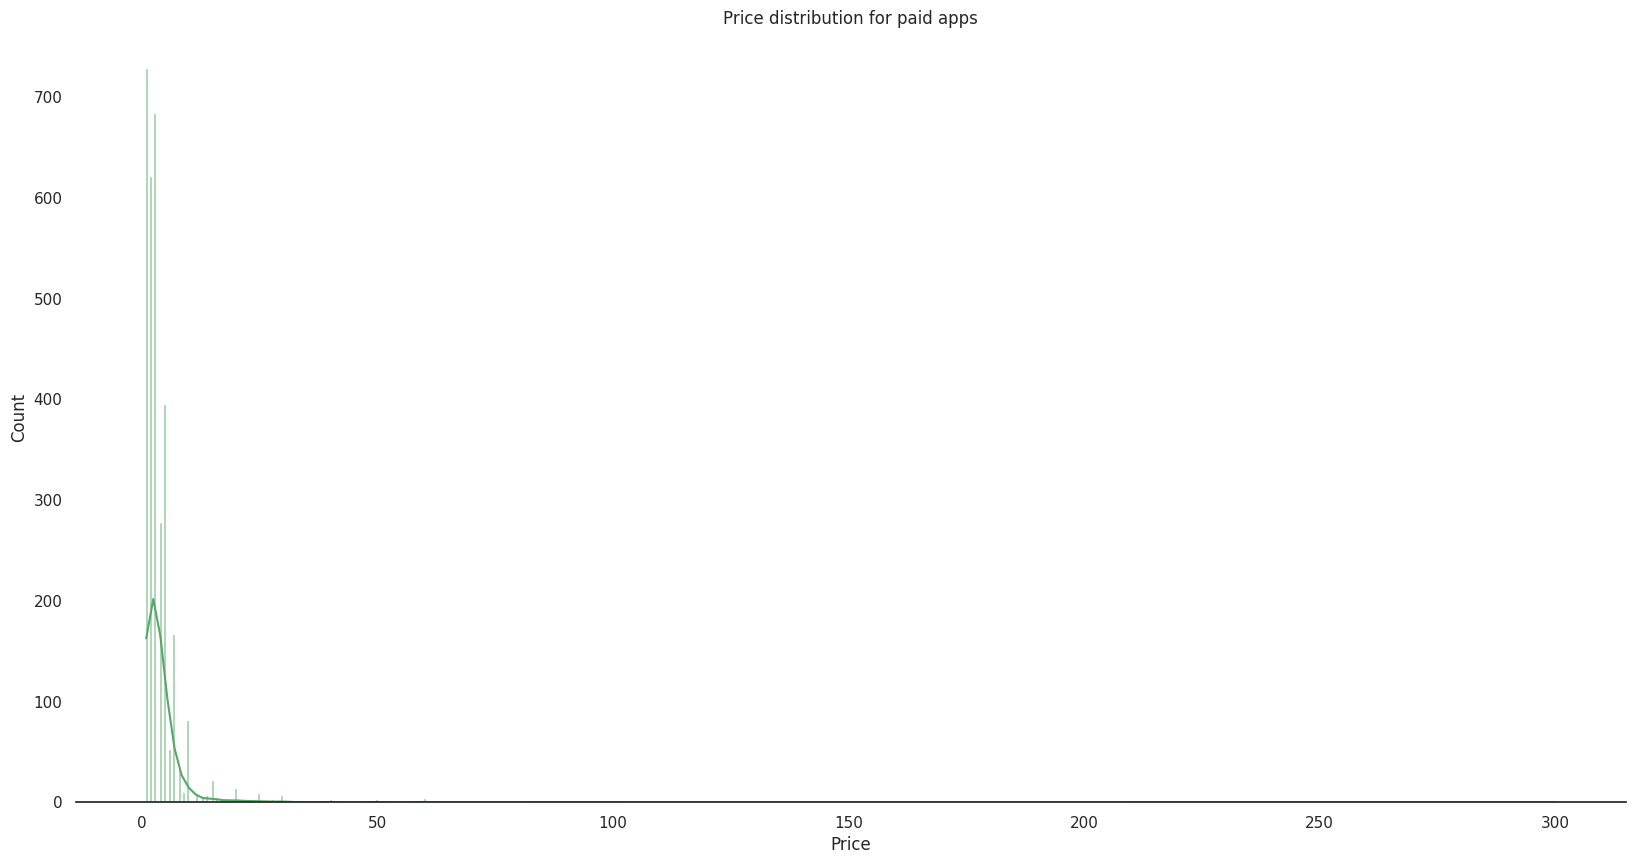

In [123]:
f, ax = plt.subplots(figsize=(20, 10))
#Check the new distribution
sns.histplot(paid_data['price'], color="g",kde=True);
ax.xaxis.grid(False) # False: remove grid along y-axis
ax.set(ylabel="Count")
ax.set(xlabel="Price")
ax.set(title="Price distribution for paid apps")
sns.despine(left=True) # Do not show the left axis when left=True
plt.show()

price counts for paid apps:
price
0.99      728
2.99      683
1.99      621
4.99      394
3.99      277
6.99      166
9.99       81
5.99       52
7.99       33
14.99      21
19.99      13
8.99        9
24.99       8
29.99       6
13.99       6
11.99       6
12.99       5
15.99       4
17.99       3
59.99       3
39.99       2
49.99       2
16.99       2
22.99       2
20.99       2
27.99       2
23.99       2
299.99      1
249.99      1
21.99       1
34.99       1
47.99       1
74.99       1
99.99       1
18.99       1
Name: count, dtype: int64


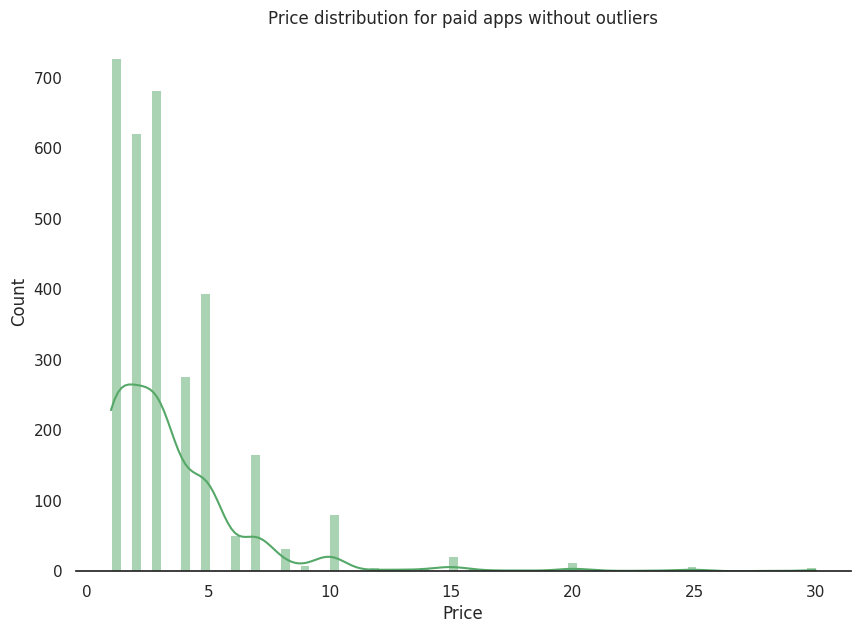

In [124]:
# We can tell that there are some outliers for price.
price_counts=paid_data['price'].value_counts().sort_values(ascending=False)
print('price counts for paid apps:\n{}'.format(price_counts))
# We consider price higher that 30 as outliers
paid_data_no_outlier=paid_data.loc[paid_data['price']<30]
f, ax = plt.subplots(figsize=(10, 7))
#Check the new distribution
sns.histplot(paid_data_no_outlier['price'], color="g",kde=True);
ax.xaxis.grid(False) # False: remove grid along y-axis
ax.set(ylabel="Count")
ax.set(xlabel="Price")
ax.set(title="Price distribution for paid apps without outliers")
sns.despine(left=True) # Do not show the left axis when left=True
plt.show()

genre counts for paid apps:
prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: count, dtype: int64


Genre that has the most apps is:Games,and genre that has the least apps is:Catalogs


mean ratings for each genre are:
prime_genre
Productivity         4.005618
Music                3.978261
Photo & Video        3.800860
Business             3.745614
Health & Fitness     3.700000
Games                3.685008
Weather              3.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'Productivity'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'Photo & Video'),
  Text(3, 0, 'Business'),
  Text(4, 0, 'Health & Fitness'),
  Text(5, 0, 'Games'),
  Text(6, 0, 'Weather'),
  Text(7, 0, 'Shopping'),
  Text(8, 0, 'Reference'),
  Text(9, 0, 'Travel'),
  Text(10, 0, 'Education'),
  Text(11, 0, 'Medical'),
  Text(12, 0, 'Utilities'),
  Text(13, 0, 'Entertainment'),
  Text(14, 0, 'Food & Drink'),
  Text(15, 0, 'Social Networking'),
  Text(16, 0, 'Sports'),
  Text(17, 0, 'News'),
  Text(18, 0, 'Lifestyle'),
  Text(19, 0, 'Navigation'),
  Text(20, 0, 'Book'),
  Text(21, 0, 'Finance'),
  Text(22, 0, 'Catalogs')])

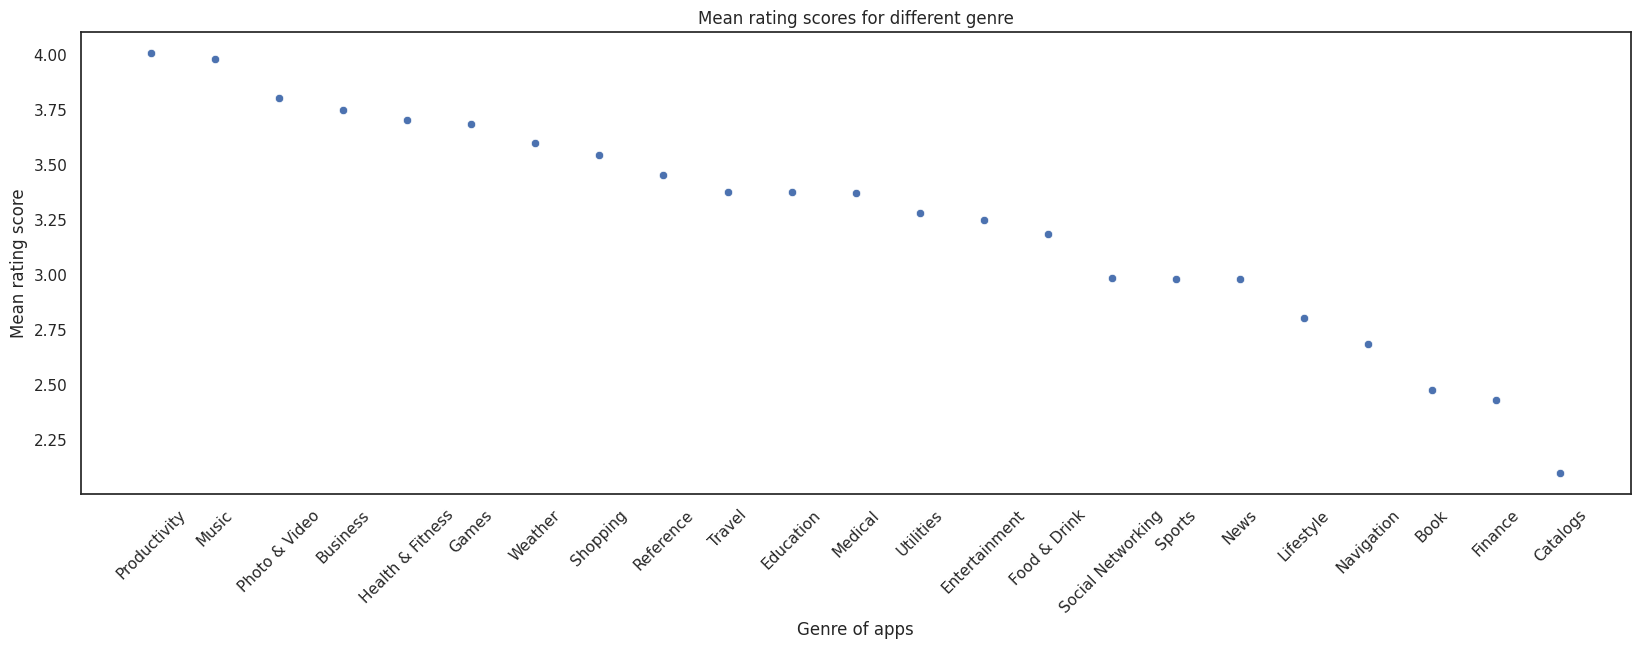

In [125]:
genre_counts=whole_data['prime_genre'].value_counts().sort_values(ascending=False)
print('genre counts for paid apps:\n{}\n'.format(genre_counts))
print('\nGenre that has the most apps is:{},and genre that has the least apps is:{}\n'.format(genre_counts.idxmax(),genre_counts.idxmin()))
mean_rating=whole_data.groupby(['prime_genre']).user_rating.mean().sort_values(ascending=False)
print("\nmean ratings for each genre are:\n{}".format(mean_rating))
print('\nGenre that has the highest average rating is:{},and genre that has the lowest average rating is:{}\n'.format(mean_rating.idxmax(),mean_rating.idxmin()))
fig,ax=plt.subplots(figsize=(20,6))
ax=sns.scatterplot(data=mean_rating)
ax.set(ylabel="Mean rating score")
ax.set(xlabel="Genre of apps")
ax.set(title="Mean rating scores for different genre")
plt.xticks(rotation=45)

There are 23 genres and we reduce genres to six for better analysis


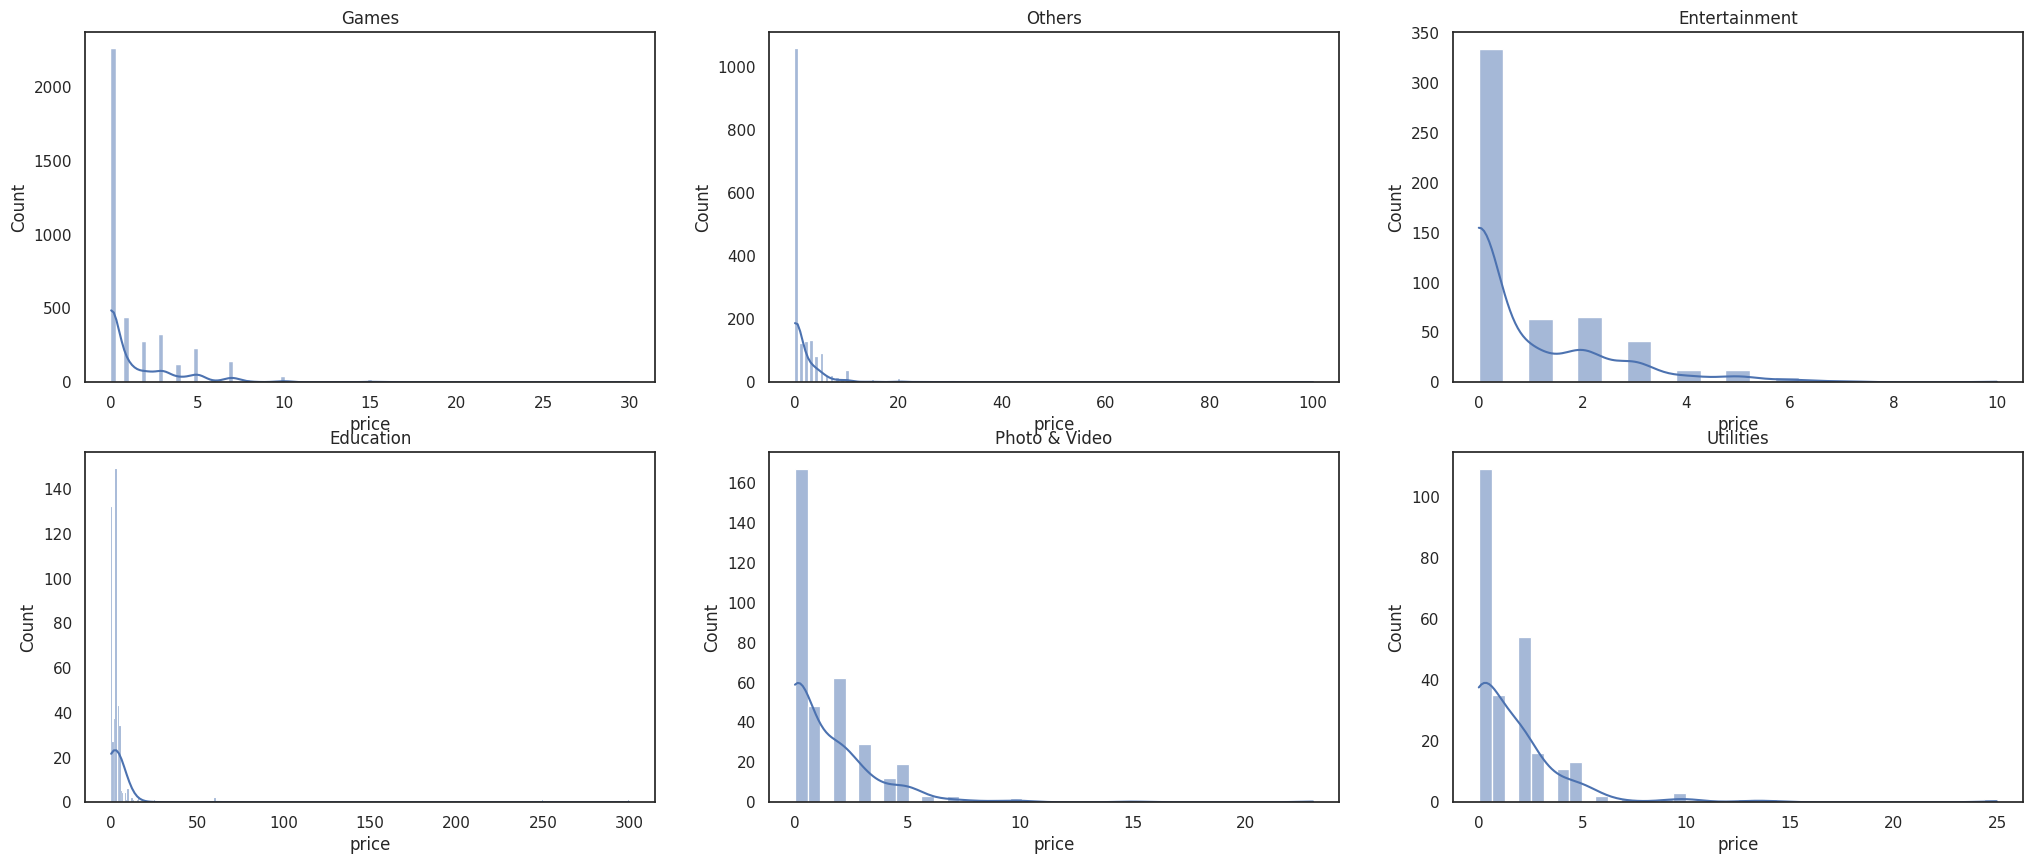

In [126]:
print('There are {} genres and we reduce genres to six for better analysis'.format(len(list(genre_counts.index))))
top_five_genres=list(genre_counts.index)[:5]
def reduce_genre(genre):
    if genre in top_five_genres:
        return genre
    else:
        return 'Others'
whole_data['reduced_genre']=whole_data['prime_genre'].apply(lambda x:reduce_genre(x))
reduced_genre=list(whole_data['reduced_genre'].value_counts(ascending=False).index)
fig,axes=plt.subplots(2,3,figsize=(25,10))
for genre,ax in zip(reduced_genre,axes.ravel()):# since here we are tring to plot 2*3 subplots. we need to ravel axes.
    data=whole_data.loc[whole_data['reduced_genre']==genre,'price']
    ax.set_title("{}".format(genre))
    sns.histplot(data, color="b",kde=True,ax=ax)


In [127]:
# notice that except for education and others, the maximun prices for other genres are no more than 30.
# Let take a close look at the education and others genre.
education_data=whole_data.loc[whole_data['reduced_genre']=='Education']
# Show the price and rating of the app that has a price higher than 30
high_priced_education_apps=education_data.loc[education_data.price>=30,['track_name','price','user_rating','prime_genre','reduced_genre']].sort_values(by='price')
others_data=whole_data.loc[whole_data['reduced_genre']=='Others']
high_priced_other_apps=others_data.loc[others_data.price>=30,['track_name','price','user_rating','prime_genre','reduced_genre']].sort_values(by='price')
apps_over_30=pd.concat([high_priced_education_apps,high_priced_other_apps]).sort_values(by='price').reset_index(drop=True)
apps_over_30

track_name   price  user_rating  \
0   Anatomy & Physiology: Body Structures and Func...   34.99          4.5   
1                                         KORG Gadget   39.99          4.5   
2                                         KORG Module   39.99          4.0   
3                         プチ・ロワイヤル仏和辞典（第4版）・和仏辞典（第3版）   47.99          0.0   
4            Cubasis 2 - Mobile Music Creation System   49.99          4.0   
5    VPN Pro | Lifetime Proxy & Best VPN by Betternet   49.99          4.5   
6                            Articulation Station Pro   59.99          4.5   
7                        Articulation Test Center Pro   59.99          4.5   
8    FineScanner Pro - PDF Document Scanner App + OCR   59.99          4.0   
9                                      NAVIGON Europe   74.99          3.5   
10                                        KNFB Reader   99.99          4.5   
11                     Proloquo2Go - Symbol-based AAC  249.99          4.0   
12                                LAMP Words For Life  299.99          4.0   

     prime_genre reduced_genre  
0        Medical        Others  
1          Music        Others  
2          Music        Others  
3      Reference        Others  
4          Music        Others  
5       Business        Others  
6      Education     Education  
7      Education     Education  
8       Business        Others  
9     Navigation        Others  
10  Productivity        Others  
11     Education     Education  
12     Education     Education

In [130]:
free = whole_data.loc[whole_data.price==0,'reduced_genre'].value_counts().reset_index()
paid = whole_data.loc[whole_data.price>0,'reduced_genre'].value_counts().reset_index()
total= whole_data.loc[:,'reduced_genre'].value_counts().reset_index()
free.columns=['genre','free_apps']
paid.columns=['genre','paid_apps']
total.columns=['genre','total_apps']
paid_free=free.merge(paid,on='genre').merge(total,on='genre')
paid_free['paid_percentage']=(paid_free['paid_apps']/paid_free['total_apps'])*100
paid_free['free_percentage']=(paid_free['free_apps']/paid_free['total_apps'])*100
paid_free

genre  free_apps  paid_apps  total_apps  paid_percentage  \
0          Games       2257       1605        3862        41.558778   
1         Others       1057        693        1750        39.600000   
2  Entertainment        334        201         535        37.570093   
3  Photo & Video        167        182         349        52.148997   
4      Education        132        321         453        70.860927   
5      Utilities        109        139         248        56.048387   

   free_percentage  
0        58.441222  
1        60.400000  
2        62.429907  
3        47.851003  
4        29.139073  
5        43.951613

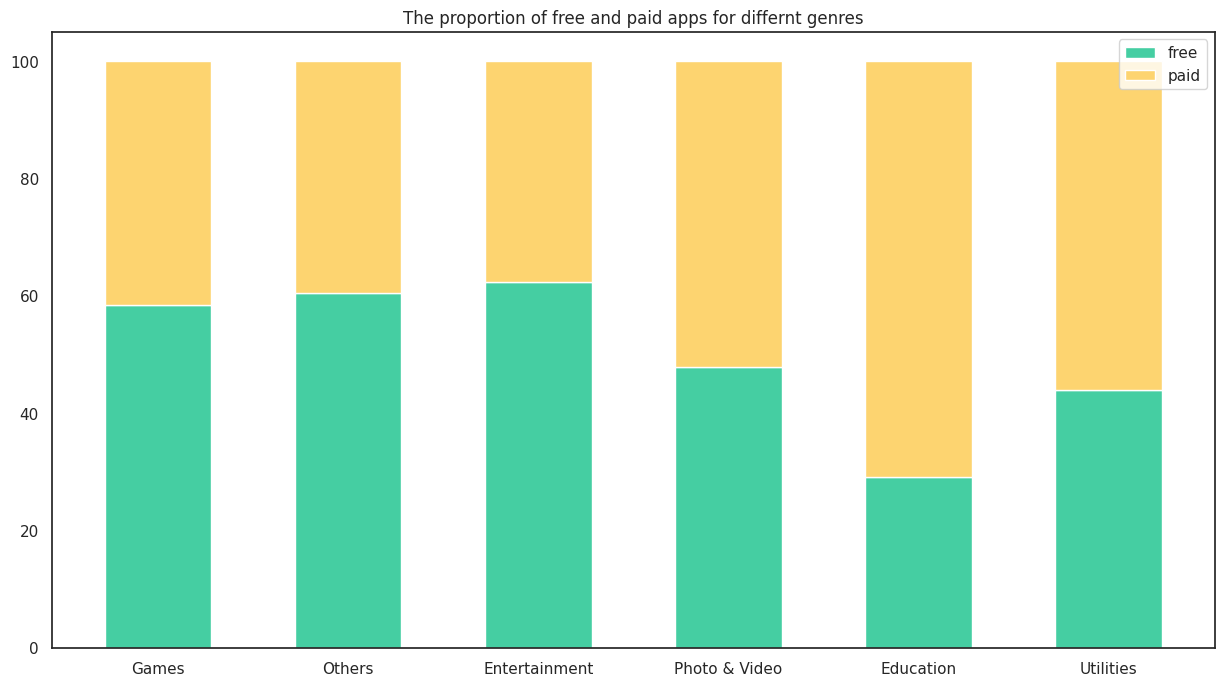

In [131]:
list_free= paid_free.free_percentage.tolist()
list_paid=paid_free.paid_percentage.tolist()

plt.figure(figsize=(15,8))
N=6
ind = np.arange(N)    # the x locations for the groups
width =0.56   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, list_free, width, color='#45cea2')
p2 = plt.bar(ind, list_paid, width,bottom=list_free,color='#fdd470')
plt.xticks(ind,paid_free.genre.tolist())
plt.legend((p1[0], p2[0]), ('free', 'paid'),loc='upper right')
plt.title("The proportion of free and paid apps for differnt genres")
plt.show()

Text(0, 0.5, 'User rating')

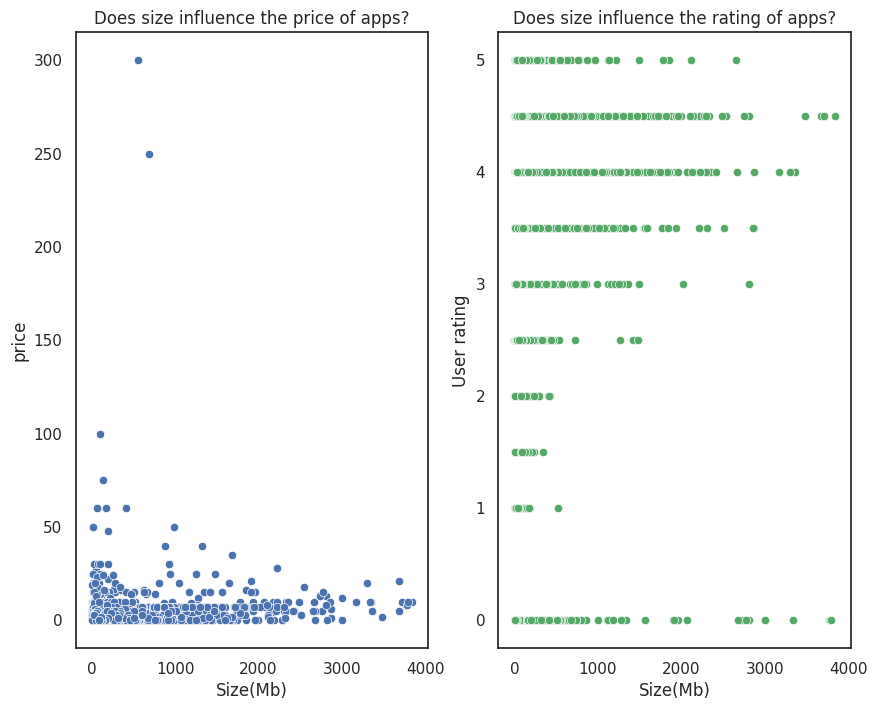

In [132]:
whole_data['size_mb']=whole_data['size_bytes']/1048576
fig,axes=plt.subplots(1,2,figsize=(10,8))
sns.scatterplot(x='size_mb',y='price',data=whole_data,ax=axes[0],color='b')
sns.scatterplot(x='size_mb',y='user_rating',data=whole_data,ax=axes[1],color='g')
axes[0].set_title('Does size influence the price of apps?')
axes[0].set_xlabel('Size(Mb)')
axes[1].set_title('Does size influence the rating of apps?')
axes[1].set_xlabel('Size(Mb)')
axes[1].set_ylabel('User rating')

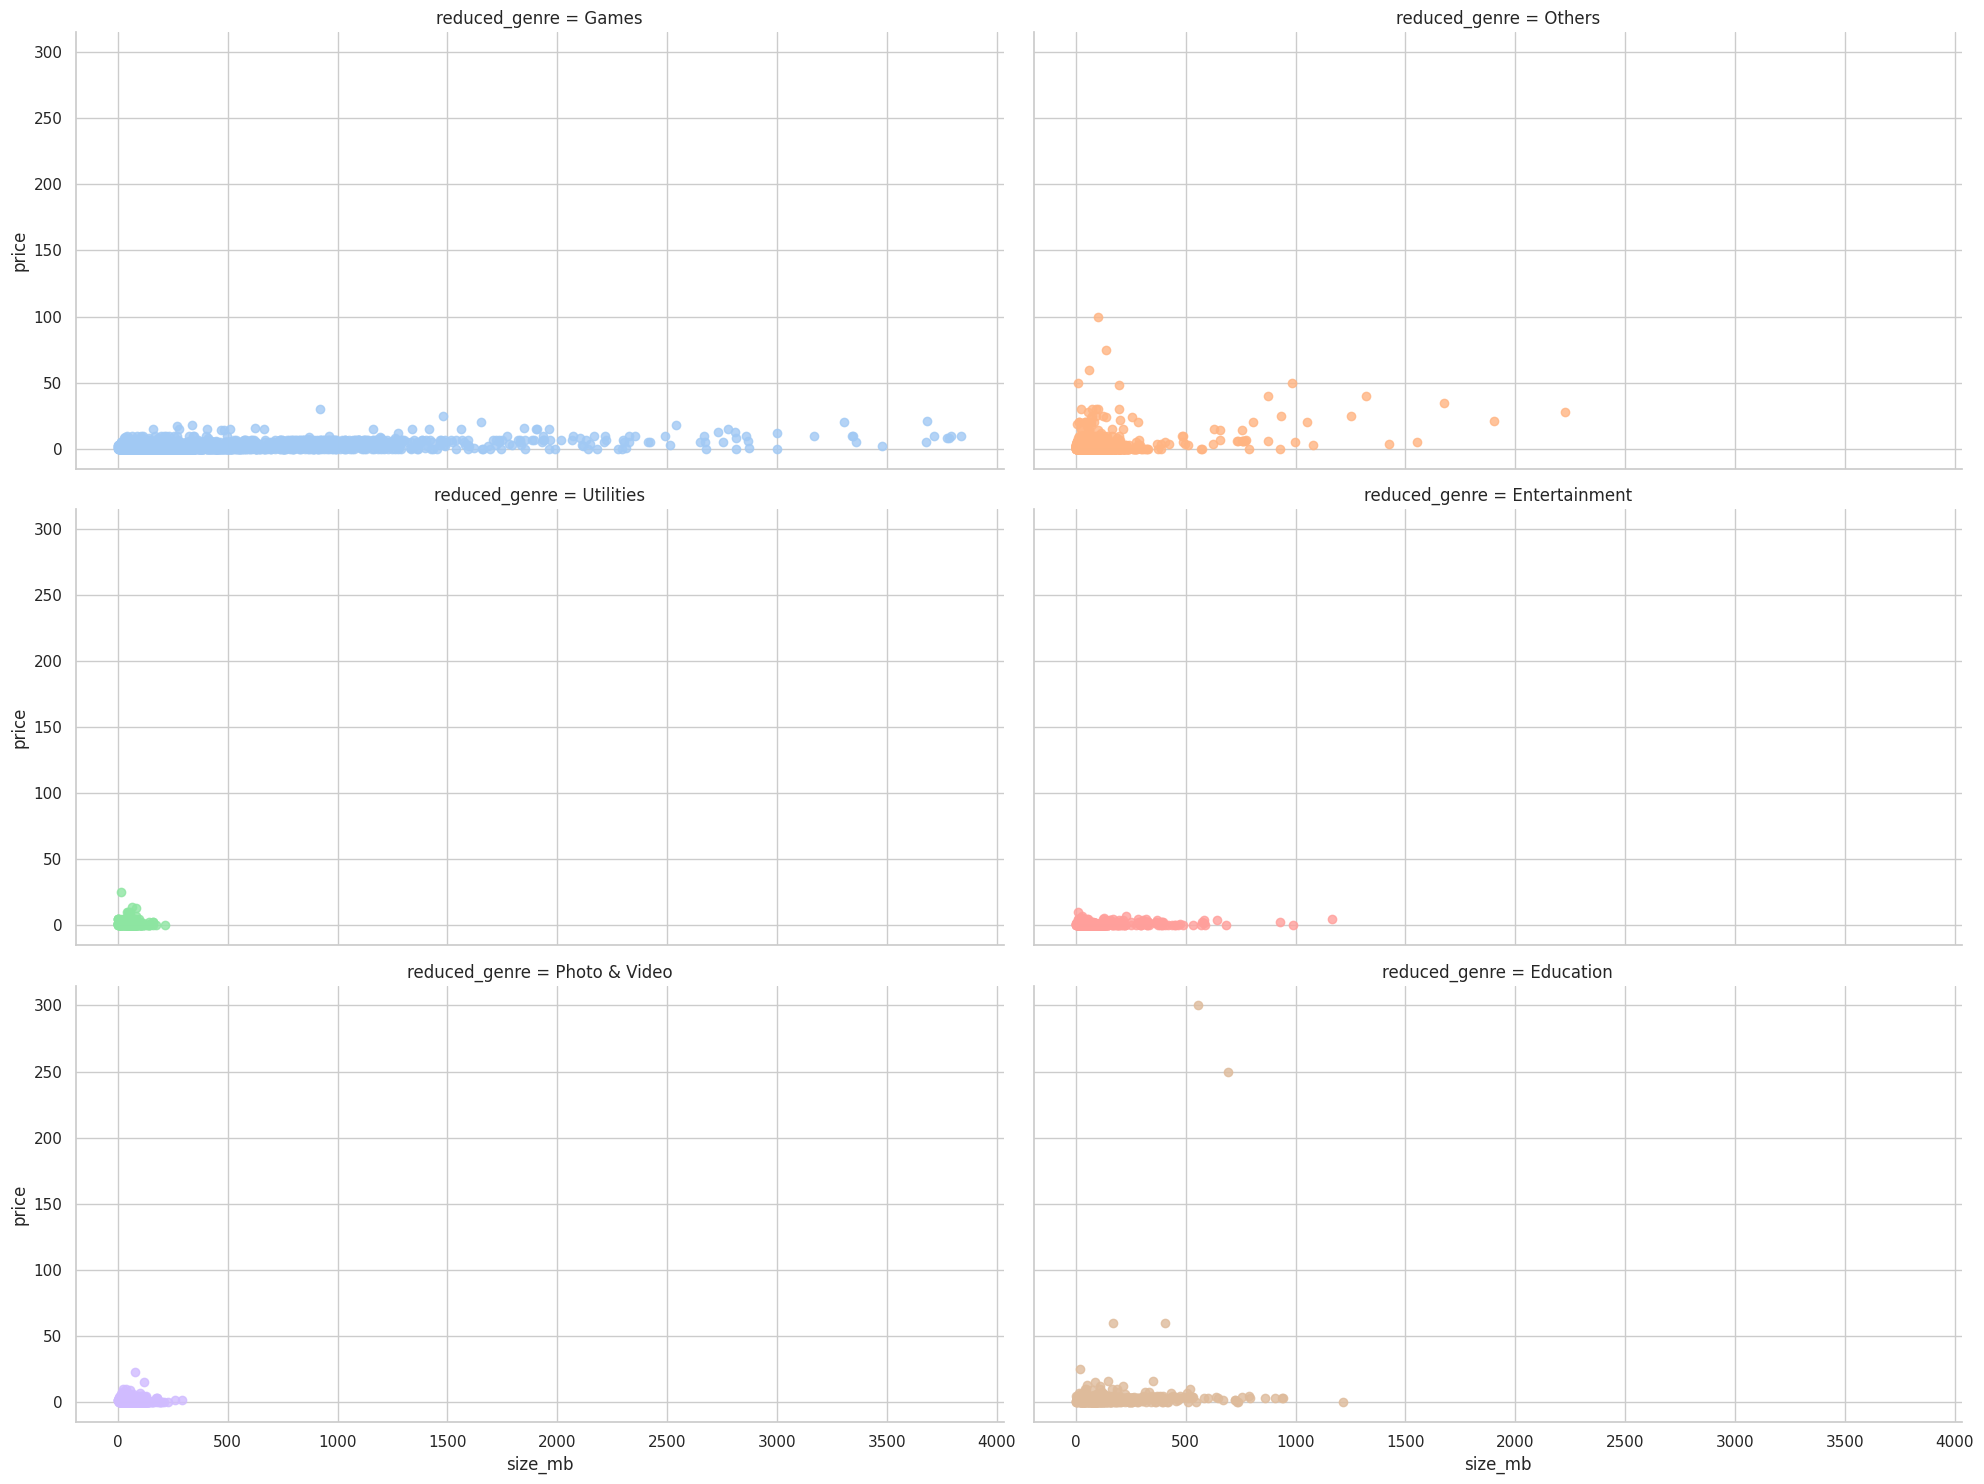

In [133]:
# How about for each genres-price and size,hue=reduced_genre
#lmplot is used to fit a regression
sns.set_style("whitegrid")
# here we need to define hue and col.
# hue can be latter used to appoint color and col is used to define the subset of data to be drawn.
ax=sns.lmplot(data=whole_data,x='size_mb',y='price',aspect=2,col_wrap=2,hue='reduced_genre',col='reduced_genre',fit_reg=False,palette = sns.color_palette("pastel", 6))

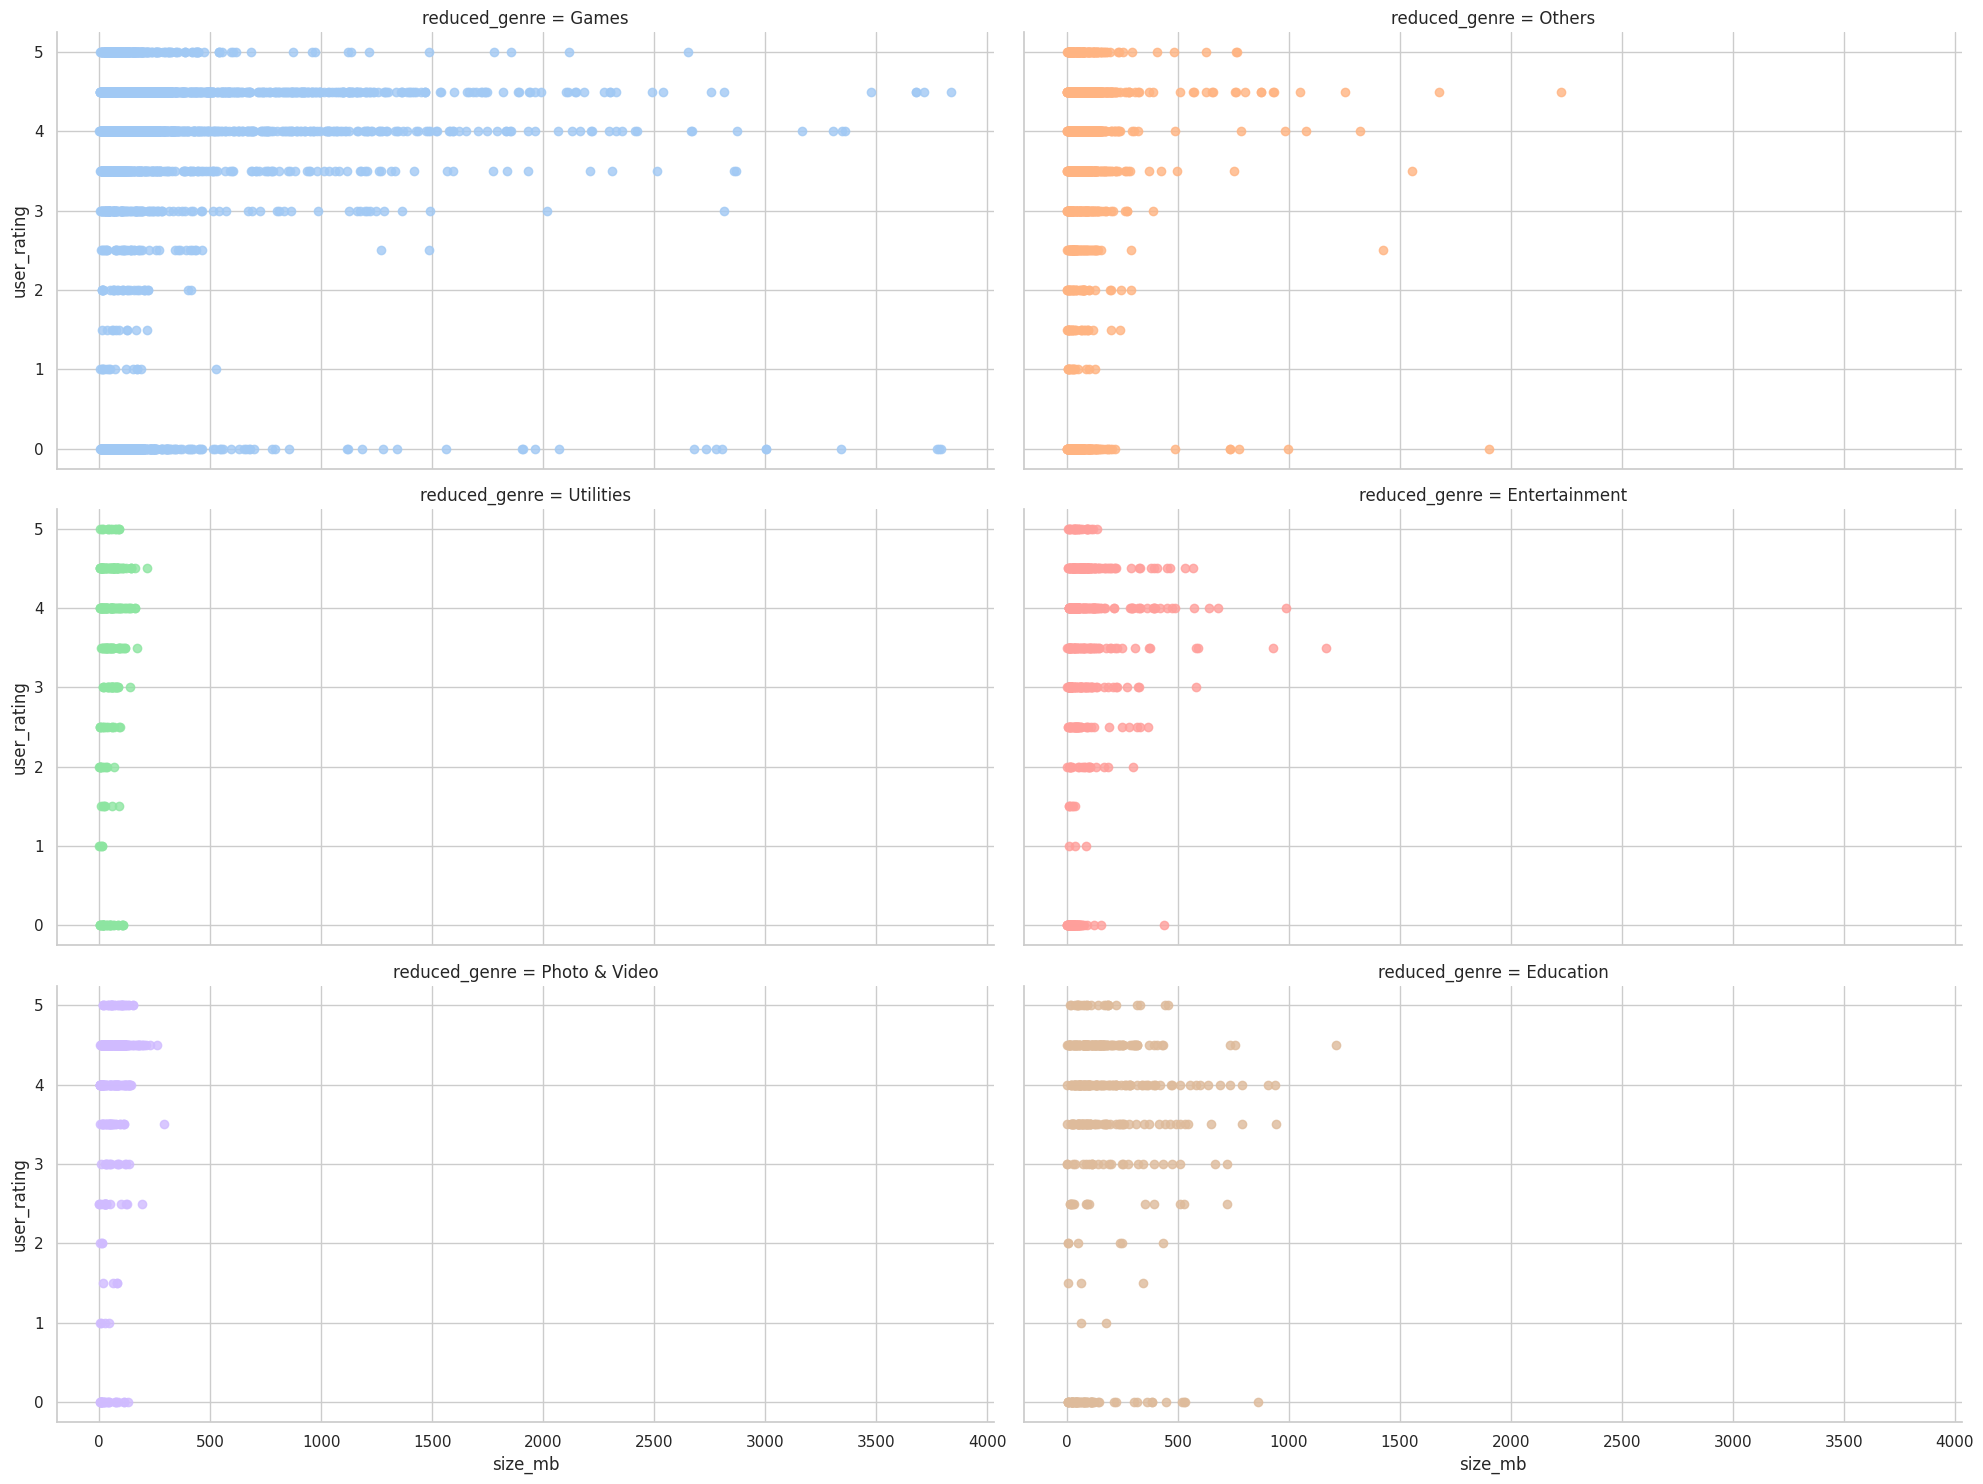

In [134]:
# How about for each genres-rating and size,hue=reduced_genre
#lmplot is used to fit a regression
sns.set_style("whitegrid")
# here we need to define hue and col.
# hue can be latter used to appoint color and col is used to define the subset of data to be drawn.
ax=sns.lmplot(data=whole_data,x='size_mb',y='user_rating',aspect=2,col_wrap=2,hue='reduced_genre',col='reduced_genre',fit_reg=False,palette = sns.color_palette("pastel", 6))

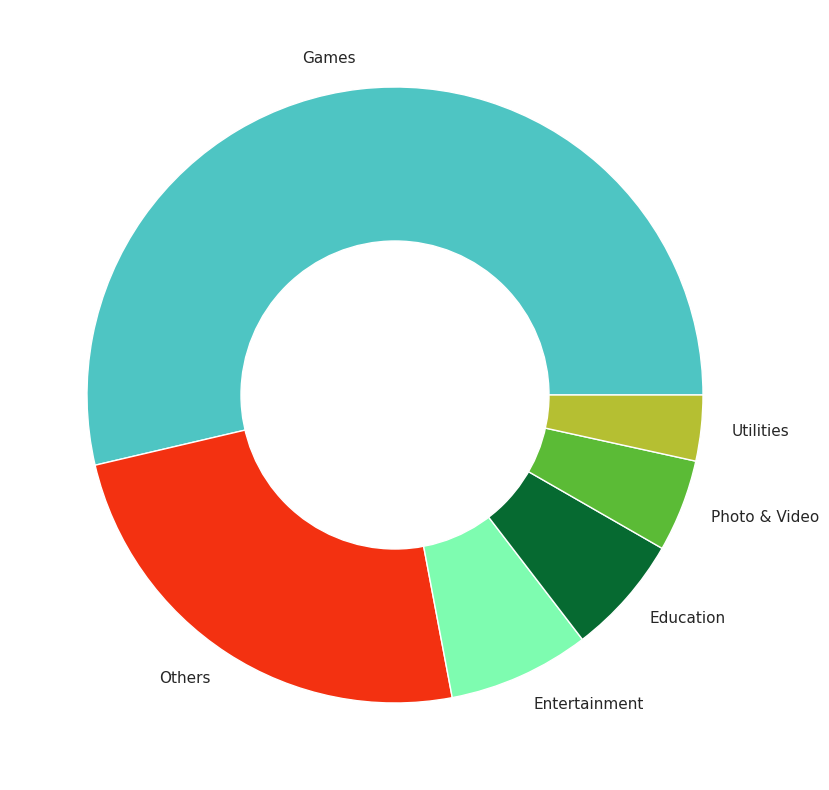

In [135]:
def random_color_generator(number_of_colors): #generate random colors
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color

app_number_each_genre=list(whole_data['reduced_genre'].value_counts(ascending=False))
plt.figure(figsize=(10,10))
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(app_number_each_genre, labels=reduced_genre, colors = random_color_generator(6))
p=plt.gcf() # Get the current figure.
p.gca().add_artist(my_circle)
plt.show()

In [136]:
paid_free

genre  free_apps  paid_apps  total_apps  paid_percentage  \
0          Games       2257       1605        3862        41.558778   
1         Others       1057        693        1750        39.600000   
2  Entertainment        334        201         535        37.570093   
3  Photo & Video        167        182         349        52.148997   
4      Education        132        321         453        70.860927   
5      Utilities        109        139         248        56.048387   

   free_percentage  
0        58.441222  
1        60.400000  
2        62.429907  
3        47.851003  
4        29.139073  
5        43.951613

<Figure size 1000x1000 with 0 Axes>

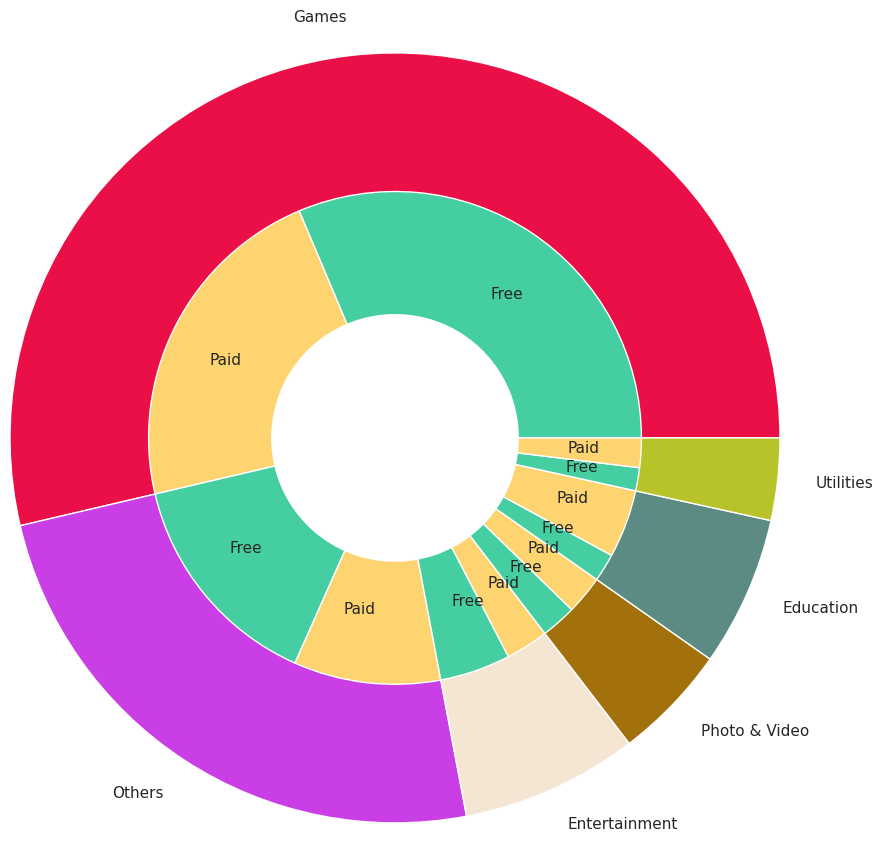

In [137]:
plt.figure(figsize=(10,10))
f=pd.DataFrame(index=np.arange(0,11,2),data=paid_free.free_apps.values,columns=['num']) #seperate the index so that when sort index,num is listed accoring to genres.
p=pd.DataFrame(index=np.arange(1,12,2),data=paid_free.paid_apps.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

# draw the outside circle
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(paid_free.total_apps.tolist(), radius=2.5, labels=paid_free.genre.tolist(), colors=random_color_generator(6))
plt.setp( mypie, width=1.2, edgecolor='white')

# prepare for the inner circle
h = ['Free', 'Paid']
subgroup_names= 6*h
sub= ['#45cea2','#fdd470']
subcolors= 6*sub
subgroup_size=final.num.tolist()

# draw the inner circle
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()

In [138]:
numeric_dtypes = ['int64','float64']
numeric = []
for i in whole_data.columns: # The column labels of the DataFrame.
    if whole_data[i].dtype in numeric_dtypes and i!='user_rating':
        numeric.append(i)
print('The number of numeric features is {}'.format(len(numeric)))

The number of numeric features is 10


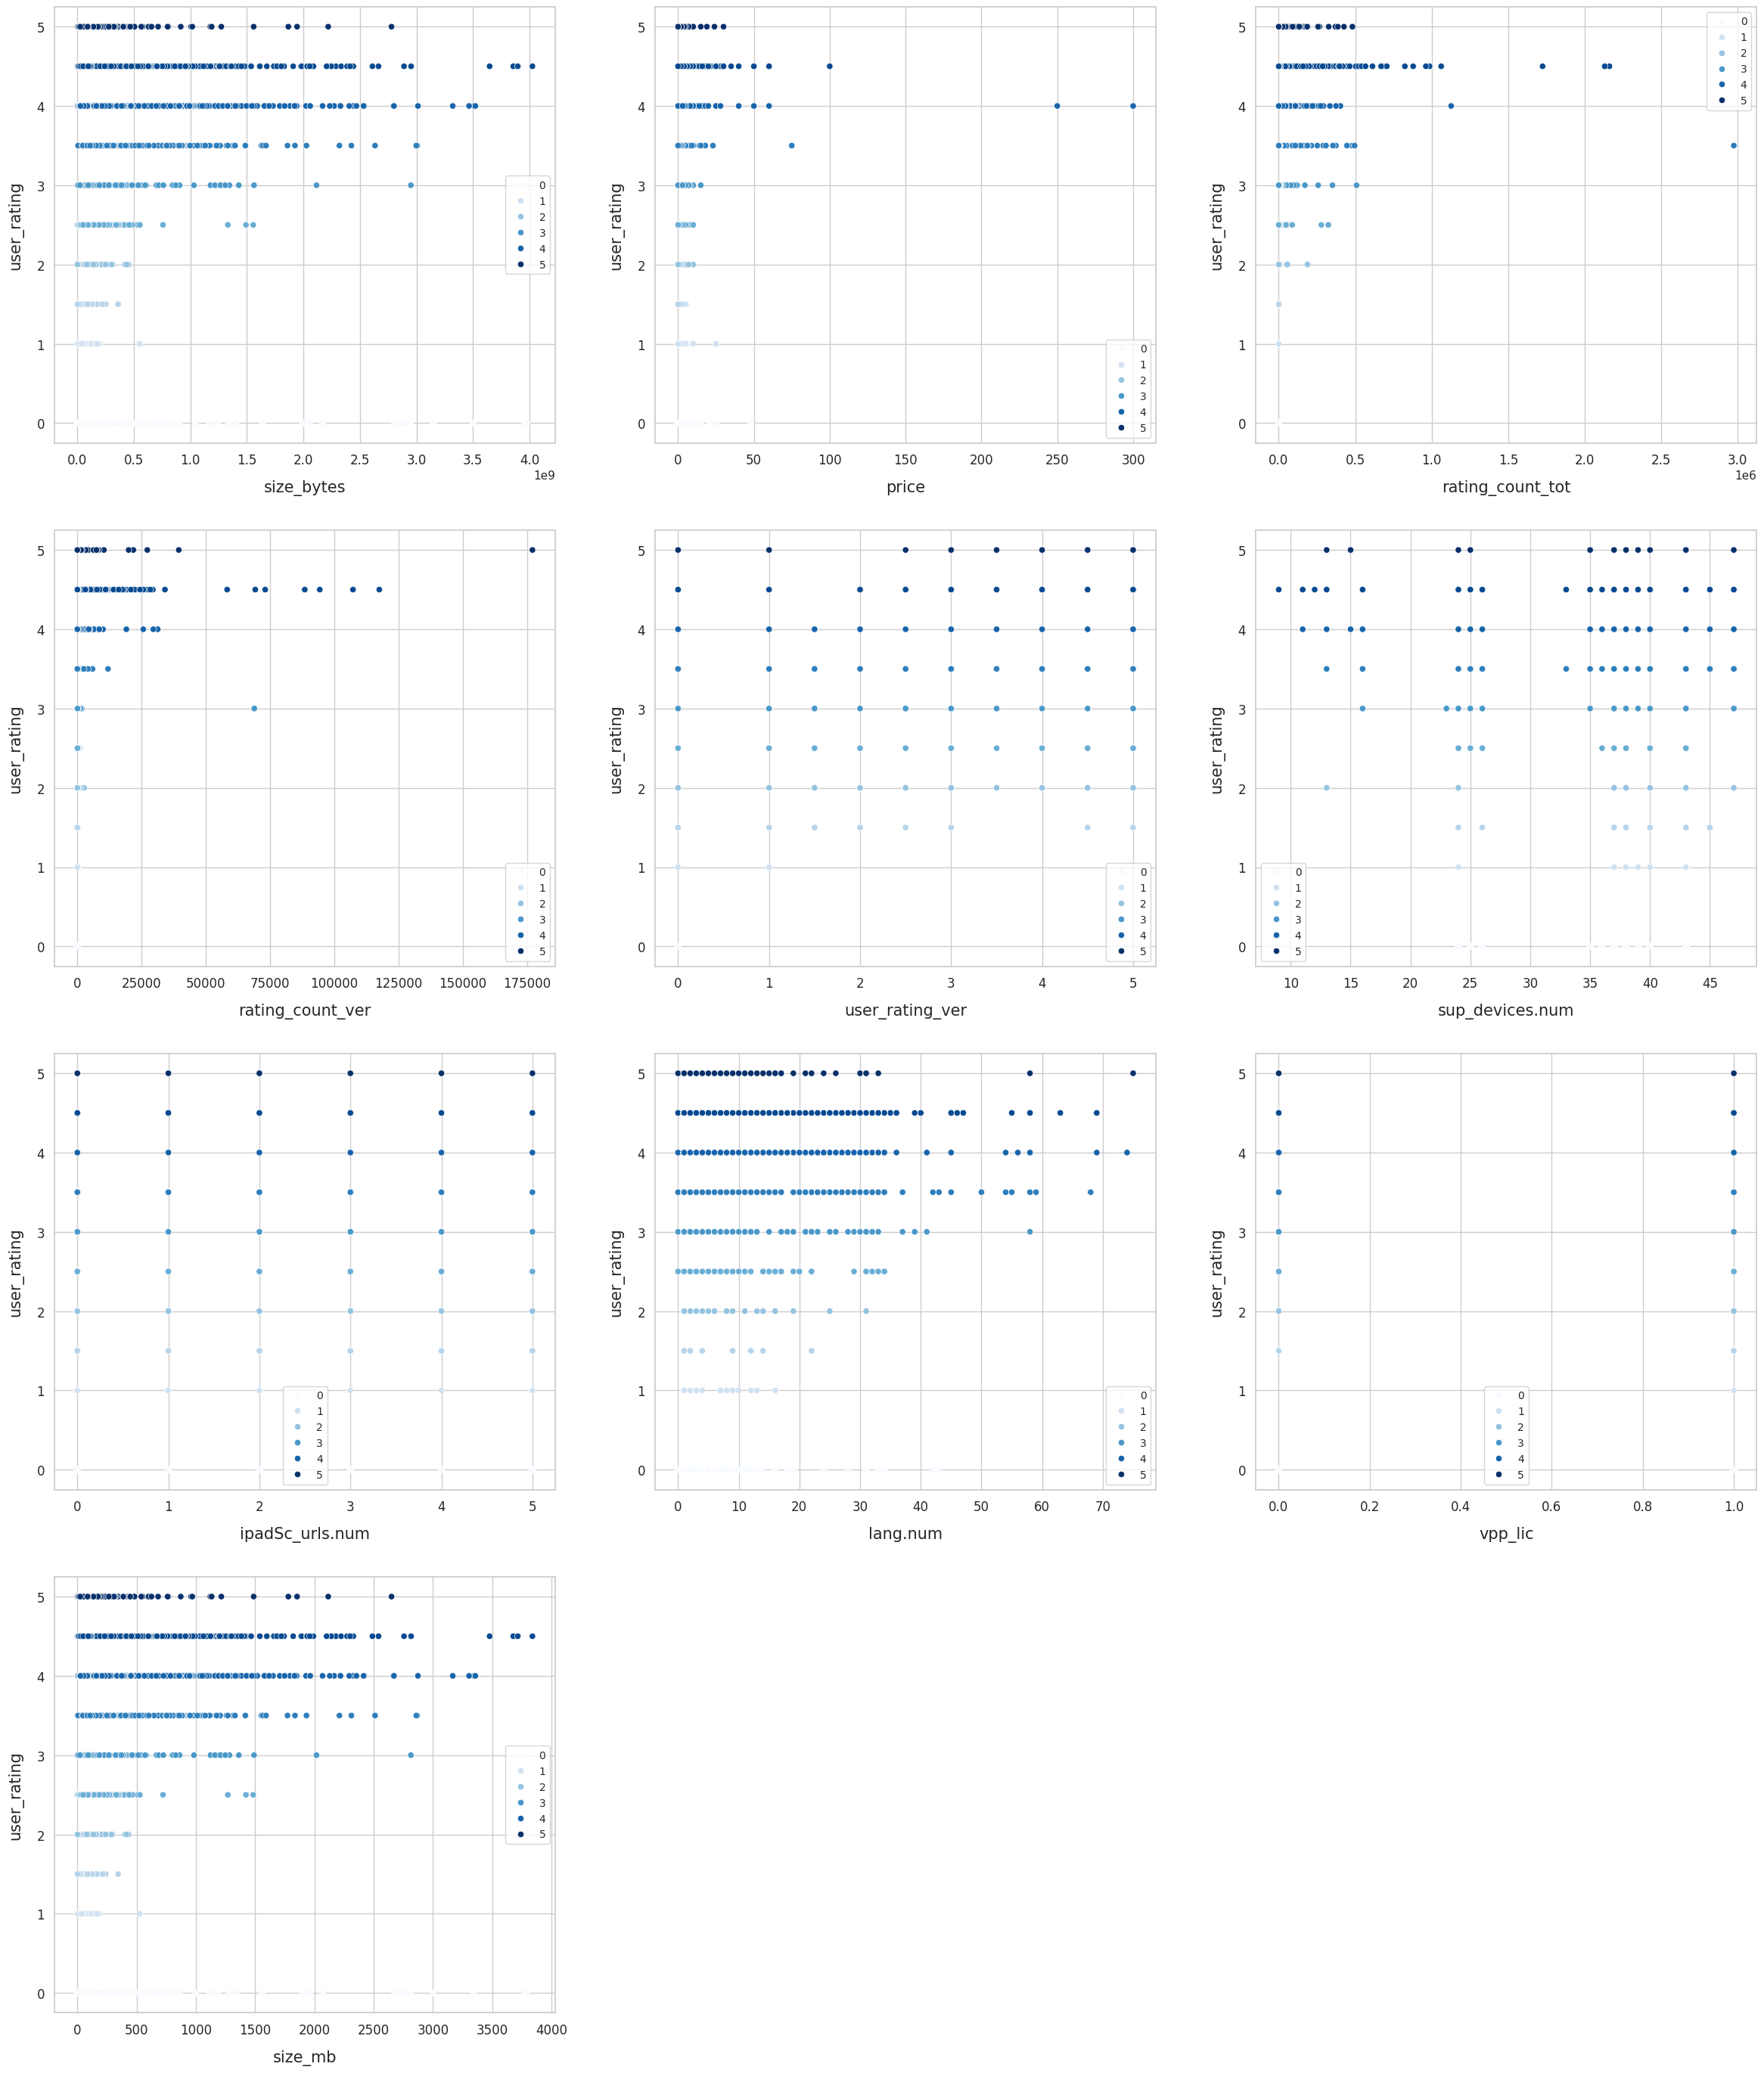

In [139]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(12, 36))
plt.subplots_adjust(right=2) #Adjust the subplot layout parameters. set the position of right edge of subplots
plt.subplots_adjust(top=2)
sns.color_palette("pastel", 8) #Return a list of colors defining a palette.
# visualising some more outliers in the data values
for i, feature in enumerate(list(whole_data[numeric]), 1):# enumerate staring from index 1 instead of 0
    plt.subplot(len(list(numeric)), 3, i) # draw the ith subplot
    sns.scatterplot(x=feature, y='user_rating', hue='user_rating',palette='Blues', data=whole_data)

    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5) #size set up fontsize
    plt.ylabel('user_rating', size=15, labelpad=12.5)

    for j in range(2):
        plt.tick_params(axis='x', labelsize=12) #Change the appearance of ticks, tick labels, and gridlines.
        plt.tick_params(axis='y', labelsize=12)

    plt.legend(loc='best', prop={'size': 10})

plt.show()

In [142]:
whole_data.head()

track_name  size_bytes currency  \
0                                    PAC-MAN Premium   100788224      USD   
1                          Evernote - stay organized   158578688      USD   
2    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032      USD   
3  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000      USD   
4                                              Bible    92774400      USD   

   price  rating_count_tot  rating_count_ver  user_rating  user_rating_ver  \
0   3.99             21292                26          4.0              4.5   
1   0.00            161065                26          4.0              3.5   
2   0.00            188583              2822          3.5              4.5   
3   0.00            262241               649          4.0              4.5   
4   0.00            985920              5320          4.5              5.0   

      ver cont_rating   prime_genre  sup_devices.num  ipadSc_urls.num  \
0   6.3.5          4+         Games               38                5   
1   8.2.2          4+  Productivity               37                5   
2   5.0.0          4+       Weather               37                5   
3  5.10.0         12+      Shopping               37                5   
4   7.5.1          4+     Reference               37                5   

   lang.num  vpp_lic                                           app_desc  \
0        10        1  SAVE 20%, now only $3.99 for a limited time!\n...   
1        23        1  Let Evernote change the way you organize your ...   
2         3        1  Download the most popular free weather app pow...   
3         9        1  The eBay app is the best way to find anything ...   
4        45        1  On more than 250 million devices around the wo...   

  reduced_genre ispaid     size_mb  
0         Games   paid   96.119141  
1        Others   free  151.232422  
2        Others   free   95.867188  
3        Others   free  122.558594  
4        Others   free   88.476562

In [145]:

# Customed functions to clean input text
#Remove punctuations, links, mentions and \r\n new line characters
#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions(@)
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'+'★'+'■'+'»'+'^'+'¿'+'*'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [146]:
texts_new= []
for t in whole_data.app_desc:
    texts_new.append(remove_mult_spaces(filter_chars(strip_all_entities(t))))
whole_data['text_clean']=texts_new

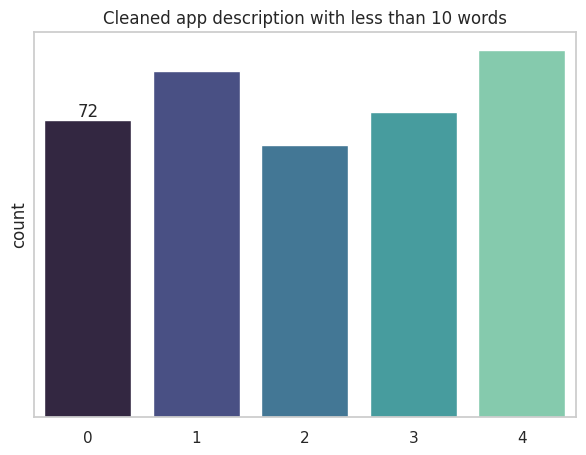

In [147]:
# Then we check our clean text to see if we have removed to much information during data cleaning.
text_len = []
for text in whole_data.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
whole_data['text_len']=text_len

plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=whole_data.loc[whole_data['text_len']<5], palette='mako')
plt.title('Cleaned app description with less than 10 words')
plt.yticks([]) #remove yticks
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()


In [148]:
# we keep app descriptions that still have 5 or more than 5 words after data cleaning.

print("rows for data before deleting:{}".format(whole_data.shape[0]))
whole_data_clean= whole_data.loc[whole_data['text_len'] > 4,:]
print("rows for data after deleting:{}".format(whole_data_clean.shape[0]))

rows for data before deleting:7197
rows for data after deleting:6812


In [149]:
# There's no missing value.
whole_data_clean.isnull().sum()

track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
app_desc            0
reduced_genre       0
ispaid              0
size_mb             0
text_clean          0
text_len            0
dtype: int64

In [150]:
# according to our experience, app description that contain words such as: sales,save,free to attract customer's attention.
# Besides,app description may include words such as: most, popular,worldwide,word,million,billion,best,top to brag about the product's quality.
# Hence, we search whether app description contains these two types of words and generate two dummies.

bargain=['sale','on sale','save','free','only','cheap','cheapest','bargain','lowest','low','limited']
quality=['most','popular','rated','bestselling','rating','perfect','world','winner','best','over','powerful','richest','leading','first','easiest','unlimited','better','famous']

# Load the SpaCy model
nlp = spacy.blank('en')
#First lets find whether there are words in each app description having words listed in 'bargain'
# Create the PhraseMatcher object. The tokenizer is the first argument. Use attr = 'LOWER' to make consistent capitalization
matcher = PhraseMatcher(nlp.vocab, attr='LOWER')
# Create a list of tokens for each item in the bargain
bargain_tokens_list = [nlp(item) for item in bargain]
# Add the item patterns to the matcher.
matcher.add("bargain",bargain_tokens_list)

bargain_dumm=[]
for idx, review in whole_data_clean.iterrows():
    doc = nlp(review.text_clean)
    # Using the matcher from the previous exercise
    matches = matcher(doc)
    # Create a set of the items found in the review text，
    found_items =set([doc[match[1]:match[2]].text.lower() for match in matches])
    if len(found_items)!=0:
        bargain_dumm.append(1)
    else:
        bargain_dumm.append(0)

In [151]:
# Then lets find whether there are words in each app description having words listed in 'quality'
matcher2 = PhraseMatcher(nlp.vocab, attr='LOWER')
quality_tokens_list = [nlp(item) for item in quality]
# Add the item patterns to the matcher.
matcher2.add("quality",quality_tokens_list)
quality_dumm=[]
for idx, review in whole_data_clean.iterrows():
    doc = nlp(review.text_clean)
    # Using the matcher from the previous exercise
    matches = matcher2(doc)
    # Create a set of the items found in the review text，
    found_items =set([doc[match[1]:match[2]].text.lower() for match in matches])
    if len(found_items)!=0:
        quality_dumm.append(1)
    else:
        quality_dumm.append(0)


In [153]:
whole_data_clean['bargain_dumm']=bargain_dumm
whole_data_clean['quality_dumm']=quality_dumm
whole_data_clean['bar_qua_sum']=whole_data_clean['bargain_dumm']+whole_data_clean['quality_dumm']
whole_data_clean['cost_effective_dumm']=whole_data_clean['bar_qua_sum']==2
whole_data_clean.drop(['bar_qua_sum'],axis=1,inplace=True)
print('There are {} descriptions involve bargain information, while {} descriptions do not involve.'.format(whole_data_clean.bargain_dumm.value_counts().tolist()[0],whole_data_clean.bargain_dumm.value_counts().tolist()[1]))
print('There are {} descriptions involve quality information, while {} descriptions do not involve.'.format(whole_data_clean.quality_dumm.value_counts().tolist()[0],whole_data_clean.quality_dumm.value_counts().tolist()[1]))
print('There are {} descriptions indicate cost effective information, while {} descriptions do not involve.'.format(whole_data_clean.cost_effective_dumm.value_counts().tolist()[0],whole_data_clean.cost_effective_dumm.value_counts().tolist()[1]))

There are 3569 descriptions involve bargain information, while 3243 descriptions do not involve.
There are 4909 descriptions involve quality information, while 1903 descriptions do not involve.
There are 3780 descriptions indicate cost effective information, while 3032 descriptions do not involve.


In [152]:
# Let's have a look at our data
whole_data_clean.head(5)

track_name  size_bytes currency  \
0                                    PAC-MAN Premium   100788224      USD   
1                          Evernote - stay organized   158578688      USD   
2    WeatherBug - Local Weather, Radar, Maps, Alerts   100524032      USD   
3  eBay: Best App to Buy, Sell, Save! Online Shop...   128512000      USD   
4                                              Bible    92774400      USD   

   price  rating_count_tot  rating_count_ver  user_rating  user_rating_ver  \
0   3.99             21292                26          4.0              4.5   
1   0.00            161065                26          4.0              3.5   
2   0.00            188583              2822          3.5              4.5   
3   0.00            262241               649          4.0              4.5   
4   0.00            985920              5320          4.5              5.0   

      ver cont_rating   prime_genre  sup_devices.num  ipadSc_urls.num  \
0   6.3.5          4+         Games               38                5   
1   8.2.2          4+  Productivity               37                5   
2   5.0.0          4+       Weather               37                5   
3  5.10.0         12+      Shopping               37                5   
4   7.5.1          4+     Reference               37                5   

   lang.num  vpp_lic                                           app_desc  \
0        10        1  SAVE 20%, now only $3.99 for a limited time!\n...   
1        23        1  Let Evernote change the way you organize your ...   
2         3        1  Download the most popular free weather app pow...   
3         9        1  The eBay app is the best way to find anything ...   
4        45        1  On more than 250 million devices around the wo...   

  reduced_genre ispaid     size_mb  \
0         Games   paid   96.119141   
1        Others   free  151.232422   
2        Others   free   95.867188   
3        Others   free  122.558594   
4        Others   free   88.476562   

                                          text_clean  text_len  
0  save 20 now only 399 for a limited time one of...       261  
1  let evernote change the way you organize your ...       585  
2  download the most popular free weather app pow...       290  
3  the ebay app is the best way to find anything ...       651  
4  on more than 250 million devices around the wo...       456

In [154]:
# Let's generate more new features for future prediction.
# 1.count the percentage of current rating
whole_data_clean['cur_rating_per']=(whole_data_clean['rating_count_ver']/(whole_data_clean['rating_count_tot']))*100
# 2. dummy:whether current rating has improved
whole_data_clean['cur_better_rating']=whole_data_clean['user_rating_ver']>whole_data_clean['user_rating']
# 3. how many main versions before
whole_data_clean['main_version_num']=whole_data_clean['ver'].str.split(pat='.',expand=True)[0]
# delete some abnormal versions
whole_data_clean['main_version_num']=whole_data_clean['main_version_num'].apply(lambda x: 0 if x=='0' else (1 if x=='1' else (2 if x=='2' else (3 if x=='3' else (4 if x=='4' else (5 if x=='5' else (6 if x=='6' else (7 if x=='7' else (8 if x=='8' else (9 if x=='9' else (10 if x=='10' else (11 if x=='11'else (12 if x=='12' else (13 if x=='13' else (14 if x=='14' else (15 if x=='15' else(16 if x=='16' else(17 if x=='17' else (18 if x=='18' else (19 if x=='19' else 20))))))))))))))))))))
whole_data_clean.loc[whole_data_clean['main_version_num']<20]
# 4. dummy: generate more accurate category classification for prime_genre (11 categories)
whole_data_clean['accu_reduced_genre']=whole_data_clean['prime_genre'].apply(lambda x: 0 if x=='Games' else (1 if x=='Entertainment' else (2 if x=='Education' else (3 if x=='Photo & Video' else (4 if x=='Utilities' else (5 if x=='Health & Fitness' else (6 if x=='Productivity' else (7 if x=='Social Networking' else (8 if x=='Music' else (9 if x=='Lifestyle' else 10))))))))))
# 5. dummy: whether used screenshots for display or not
whole_data_clean['use_screenshots']=whole_data_clean['ipadSc_urls.num']>0
# 6. dummy: whether the app only supports one language or not
whole_data_clean['only_one_language']=whole_data_clean['lang.num']==1
# 7. dummy_target: if rating equals or is higher than 4,then 1,else 0
whole_data_clean['rating_dum']=whole_data_clean['user_rating']>=4
whole_data_clean.shape

(6812, 31)

In [155]:
# generate df, which will be used to predict.
df=whole_data_clean.copy()
df.drop(['track_name','currency','ver','prime_genre','app_desc','text_clean','user_rating'],axis=1,inplace=True)
df=pd.get_dummies(df).reset_index(drop=True)
df.fillna(0,axis=1,inplace=True)

In [156]:
# shuffle our data
df=df.sample(frac=1).reset_index(drop=True)
print("We use 80% data for train({}*0.8={}), 20% data for test({}*0.2={})".format(df.shape[0],round(df.shape[0]*0.8),df.shape[0],round(df.shape[0]*0.2)))
data=df[:5450]
test_data=df[5450:]
y_data=data.pop('rating_dum')
X_data=data.copy()
y_test=test_data.pop('rating_dum')
X_test=test_data.copy()

We use 80% data for train(6812*0.8=5450), 20% data for test(6812*0.2=1362)


In [157]:
#train_valid split
X_train,X_valid,y_train,y_valid=train_test_split(X_data,y_data,test_size=0.2, random_state=1, stratify=y_data)
print('X_train shape:', X_train.shape)
print('X_valid shape:', X_valid.shape)
print('X_test shape:', X_test.shape)

X_train shape: (4360, 32)
X_valid shape: (1090, 32)
X_test shape: (1362, 32)


In [158]:
skf=StratifiedKFold(n_splits=8,shuffle=True,random_state=1)

In [163]:
pipe_lr_1=make_pipeline(RobustScaler(),LogisticRegression())
param_grid_lr = {'logisticregression__C': [0.01, 0.1, 1, 10, 100],
              'logisticregression__penalty':['l2'],
              'logisticregression__solver':['newton-cg','lbfgs','liblinear','sag','saga'],
              'logisticregression__n_jobs':[-1]}
grid_lr_1= GridSearchCV(pipe_lr_1, param_grid_lr, cv=skf,scoring='f1')
grid_lr_1.fit(X_train, y_train)
print("Best estimator:\n{}".format(grid_lr_1.best_estimator_))
print("Best gridsearch score: {:.3f}".format(grid_lr_1.best_score_))
#print("Score on validset:{:.3f}".format(grid_lr_1.score(X_valid,y_valid)))

Best estimator:
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression', LogisticRegression(C=1, n_jobs=-1))])
Best gridsearch score: 0.889


Logistic Regression
Accuracy: 0.841
Precision: 0.861
Recall: 0.918


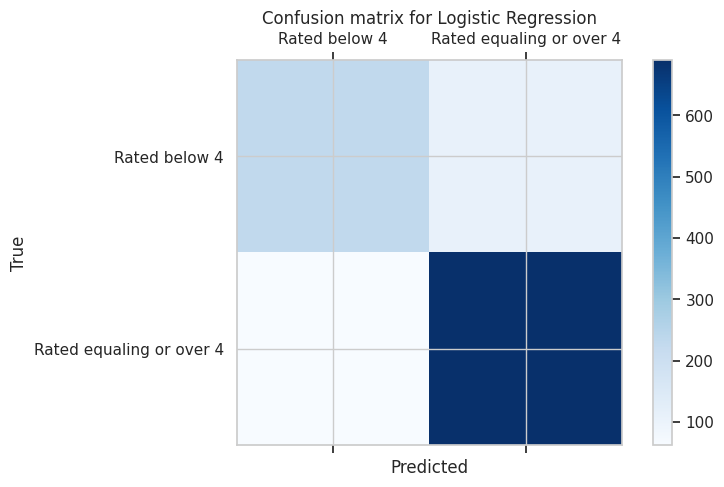

In [166]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Customized function to calculate and print evaluation metrics
def cal_evaluation(classifier, cm):
    tn, fp, fn, tp = cm.ravel()
    accuracy  = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    print(f"{classifier}")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")

# Function to draw confusion matrices
def draw_confusion_matrices(confusion_matrices):
    class_names = ['Rated below 4', 'Rated equaling or over 4']
    for classifier, cm in confusion_matrices:
        cal_evaluation(classifier, cm)
        fig, ax = plt.subplots()
        cax = ax.matshow(cm, interpolation='nearest', cmap=plt.get_cmap('Blues'))
        plt.title(f'Confusion matrix for {classifier}')
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

# Convert y_valid to binary if necessary
y_valid = y_valid.astype(int)

# Convert predicted probabilities to class labels (0 or 1)
y_pred = (grid_lr_1.predict_proba(X_valid)[:, 1] >= 0.5).astype(int)

# Ensure that y_valid contains only binary labels (0 and 1)
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_valid, y_pred)),
]

draw_confusion_matrices(confusion_matrices)


In [167]:
lr_results=grid_lr_1.best_estimator_.named_steps['logisticregression'].coef_.reshape(32,1)
features=X_train.columns.values.reshape(32,1)
features=pd.DataFrame(features,columns=['feature_name'])
coef=pd.DataFrame(lr_results,columns=['coef'])
features_coef=features.join(coef)
features_coef_pos=features_coef.sort_values(by='coef',ascending=False).reset_index(drop=True)
features_coef_pos10=features_coef_pos[:10]
features_coef_neg=features_coef.sort_values(by='coef',ascending=True).reset_index(drop=True)
features_coef_neg10=features_coef_neg[:10]
ten_pos_neg_features=features_coef_pos10.join(features_coef_neg10,lsuffix='_pos',rsuffix='_neg')
ten_pos_neg_features# indicate the most contributing features

feature_name_pos  coef_pos             feature_name_neg  \
0              user_rating_ver  1.735656            cur_better_rating   
1          cost_effective_dumm  0.690281                 bargain_dumm   
2         reduced_genre_Others  0.544440  reduced_genre_Entertainment   
3                      vpp_lic  0.484286      reduced_genre_Utilities   
4  reduced_genre_Photo & Video  0.455130            only_one_language   
5          reduced_genre_Games  0.385477              use_screenshots   
6              ipadSc_urls.num  0.321313               cur_rating_per   
7                     text_len  0.265586      reduced_genre_Education   
8                        price  0.108224           accu_reduced_genre   
9              cont_rating_12+  0.080276                 quality_dumm   

   coef_neg  
0 -2.503627  
1 -0.569456  
2 -0.542928  
3 -0.524622  
4 -0.506160  
5 -0.465847  
6 -0.424596  
7 -0.317497  
8 -0.309432  
9 -0.232531

In [171]:

# Assuming skf is a StratifiedKFold instance already defined
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Pipeline creation
pipe_rf = make_pipeline(RobustScaler(), RandomForestClassifier())

# Grid of hyperparameters
param_grid_rf = {
    'randomforestclassifier__n_estimators': [10, 100, 1000, 10000],
    'randomforestclassifier__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestclassifier__bootstrap': [True],
    'randomforestclassifier__random_state': [1],
    'randomforestclassifier__n_jobs': [-1]
}

# GridSearchCV setup
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=skf, scoring='f1')

# Fitting the model
grid_rf.fit(X_train, y_train)

# Printing best results
print("Best estimator:\n{}".format(grid_rf.best_estimator_))
print("Best grid search score: {:.3f}".format(grid_rf.best_score_))
print("Score on validation set: {:.3f}".format(grid_rf.score(X_valid, y_valid)))


Best estimator:
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                        random_state=1))])
Best grid search score: 0.922
Score on validation set: 0.926


Random Forest
Accuracy: 0.897
Precision: 0.918
Recall: 0.935


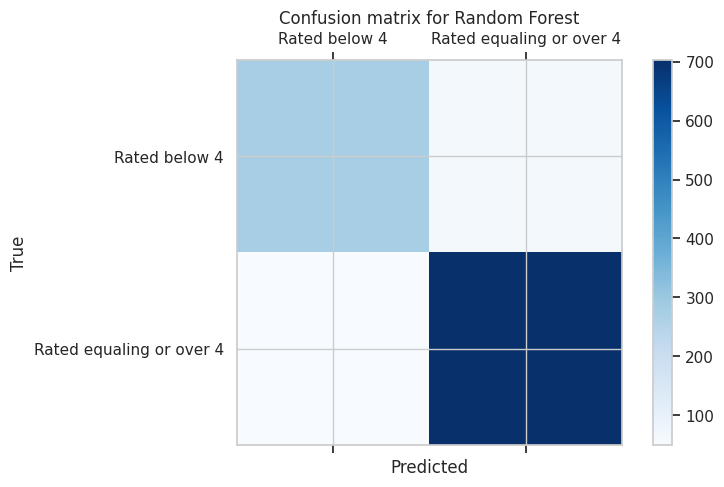

In [172]:
# confusion matrix
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_valid,grid_rf.predict(X_valid))),
]

draw_confusion_matrices(confusion_matrices)

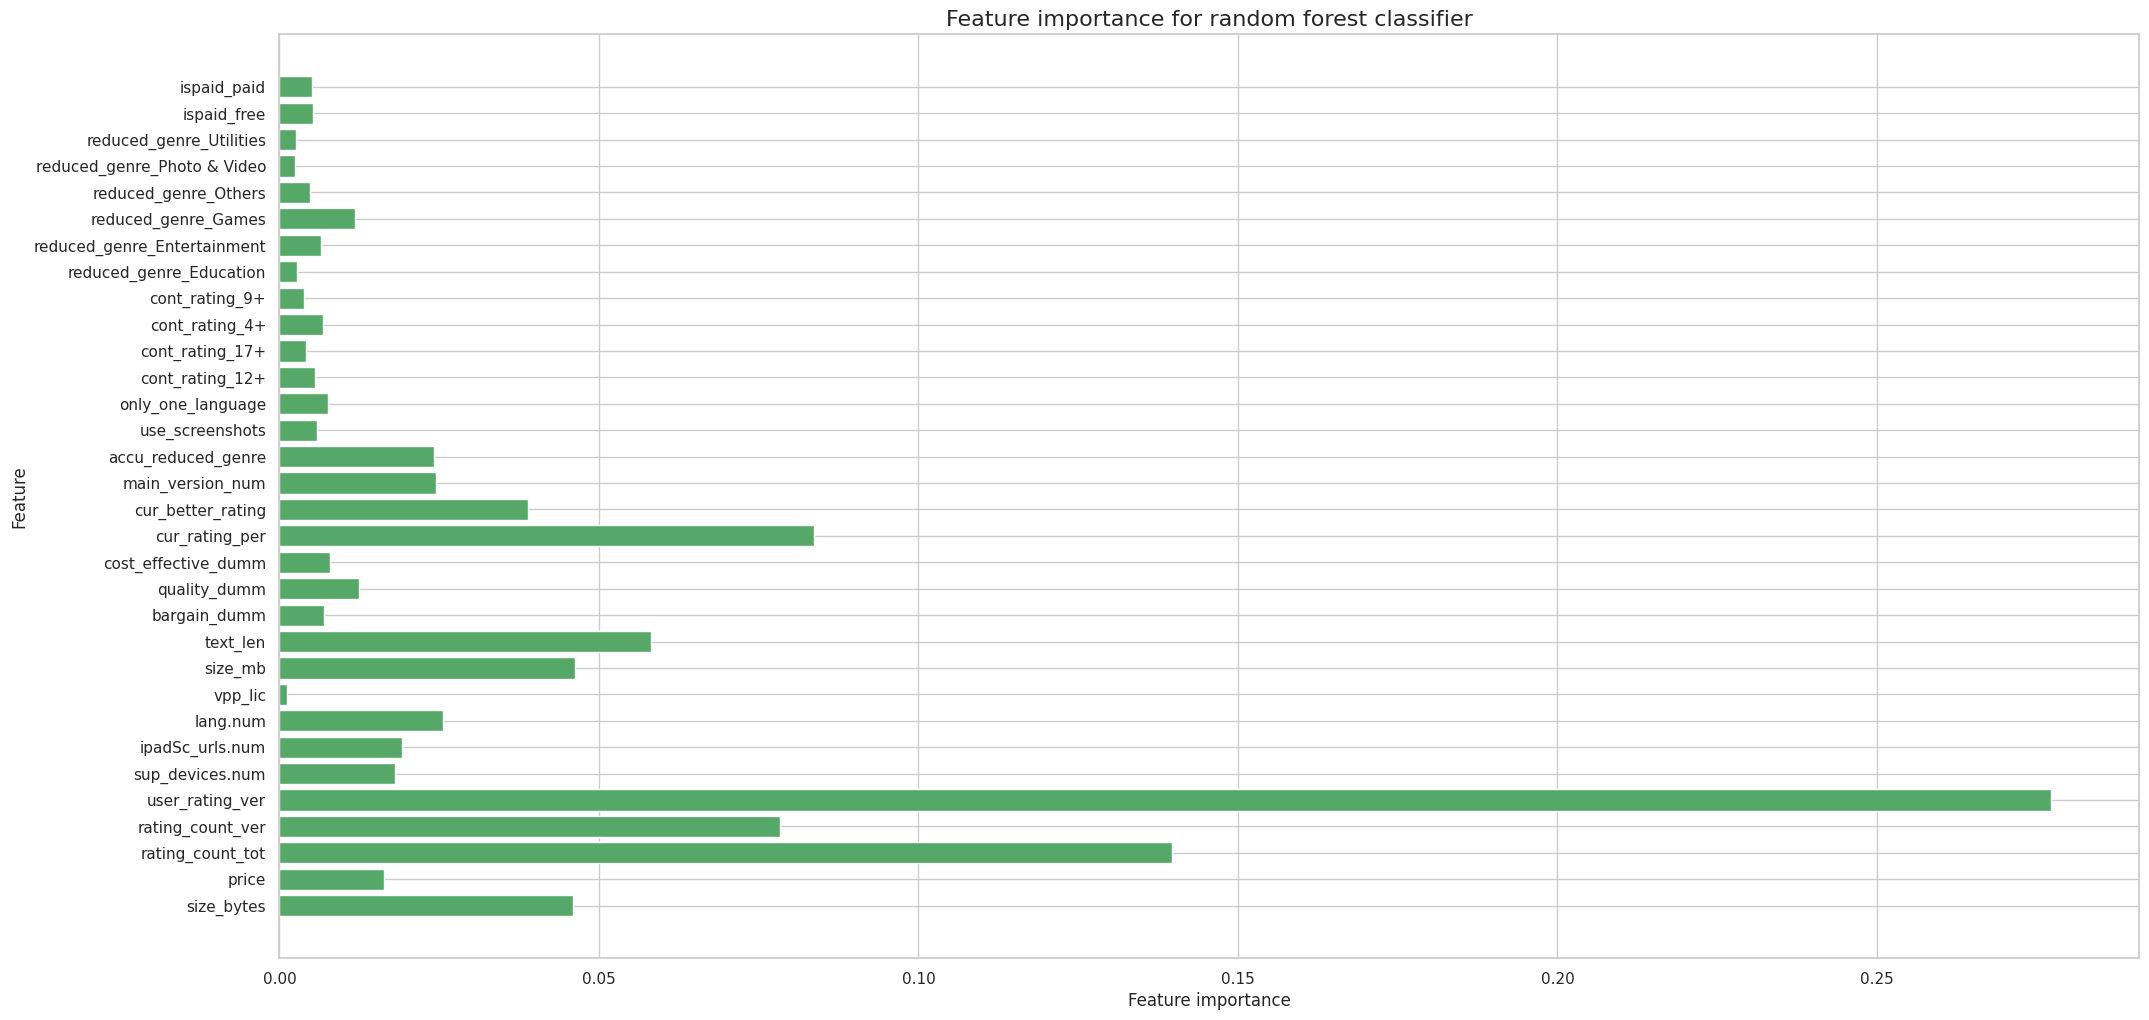

In [173]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    fig = plt.figure(figsize=(24, 12))
    plt.barh(range(n_features), model.feature_importances_, align='center',color='g')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title('Feature importance for random forest classifier',fontsize=16)

plot_feature_importances(model=grid_rf.best_estimator_.named_steps['randomforestclassifier'])

In [176]:
# Convert relevant columns to numeric (if they should be numeric)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_valid = X_valid.apply(pd.to_numeric, errors='coerce')

# For categorical columns, convert them to category type
categorical_columns = X_train.select_dtypes(include=['object']).columns
X_train[categorical_columns] = X_train[categorical_columns].astype('category')
X_valid[categorical_columns] = X_valid[categorical_columns].astype('category')

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', enable_categorical=True)

param_grid_xgb = {
    'min_child_weight': [0.1, 1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'max_depth': [6, 9, 12],
    'learning_rate': [0.001, 0.1],
    'n_jobs': [-1],
    'random_state': [1]
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=skf, scoring='f1')
grid_xgb.fit(X_train, y_train)

print("Best estimator:\n{}".format(grid_xgb.best_estimator_))
print("Best grid search score: {:.3f}".format(grid_xgb.best_score_))
print("Score on validation set: {:.3f}".format(grid_xgb.score(X_valid, y_valid)))


Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=-1, num_parallel_tree=None, random_state=1, ...)
Best grid search score: 0.934
Score on validation set: 0.933


XGBOOST
Accuracy: 0.906
Precision: 0.925
Recall: 0.940


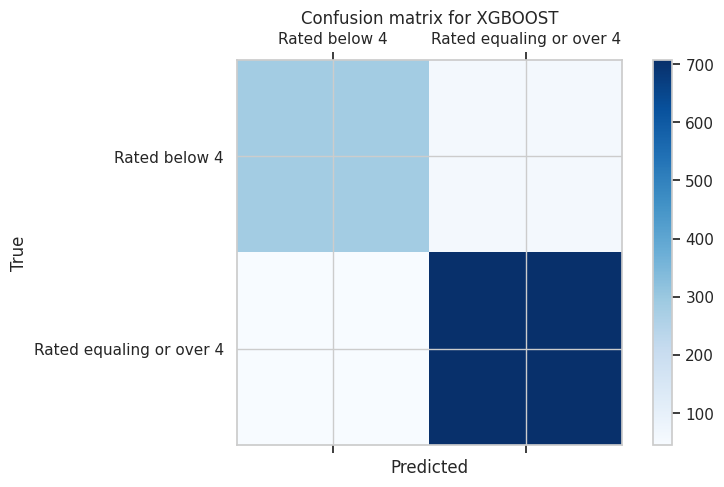

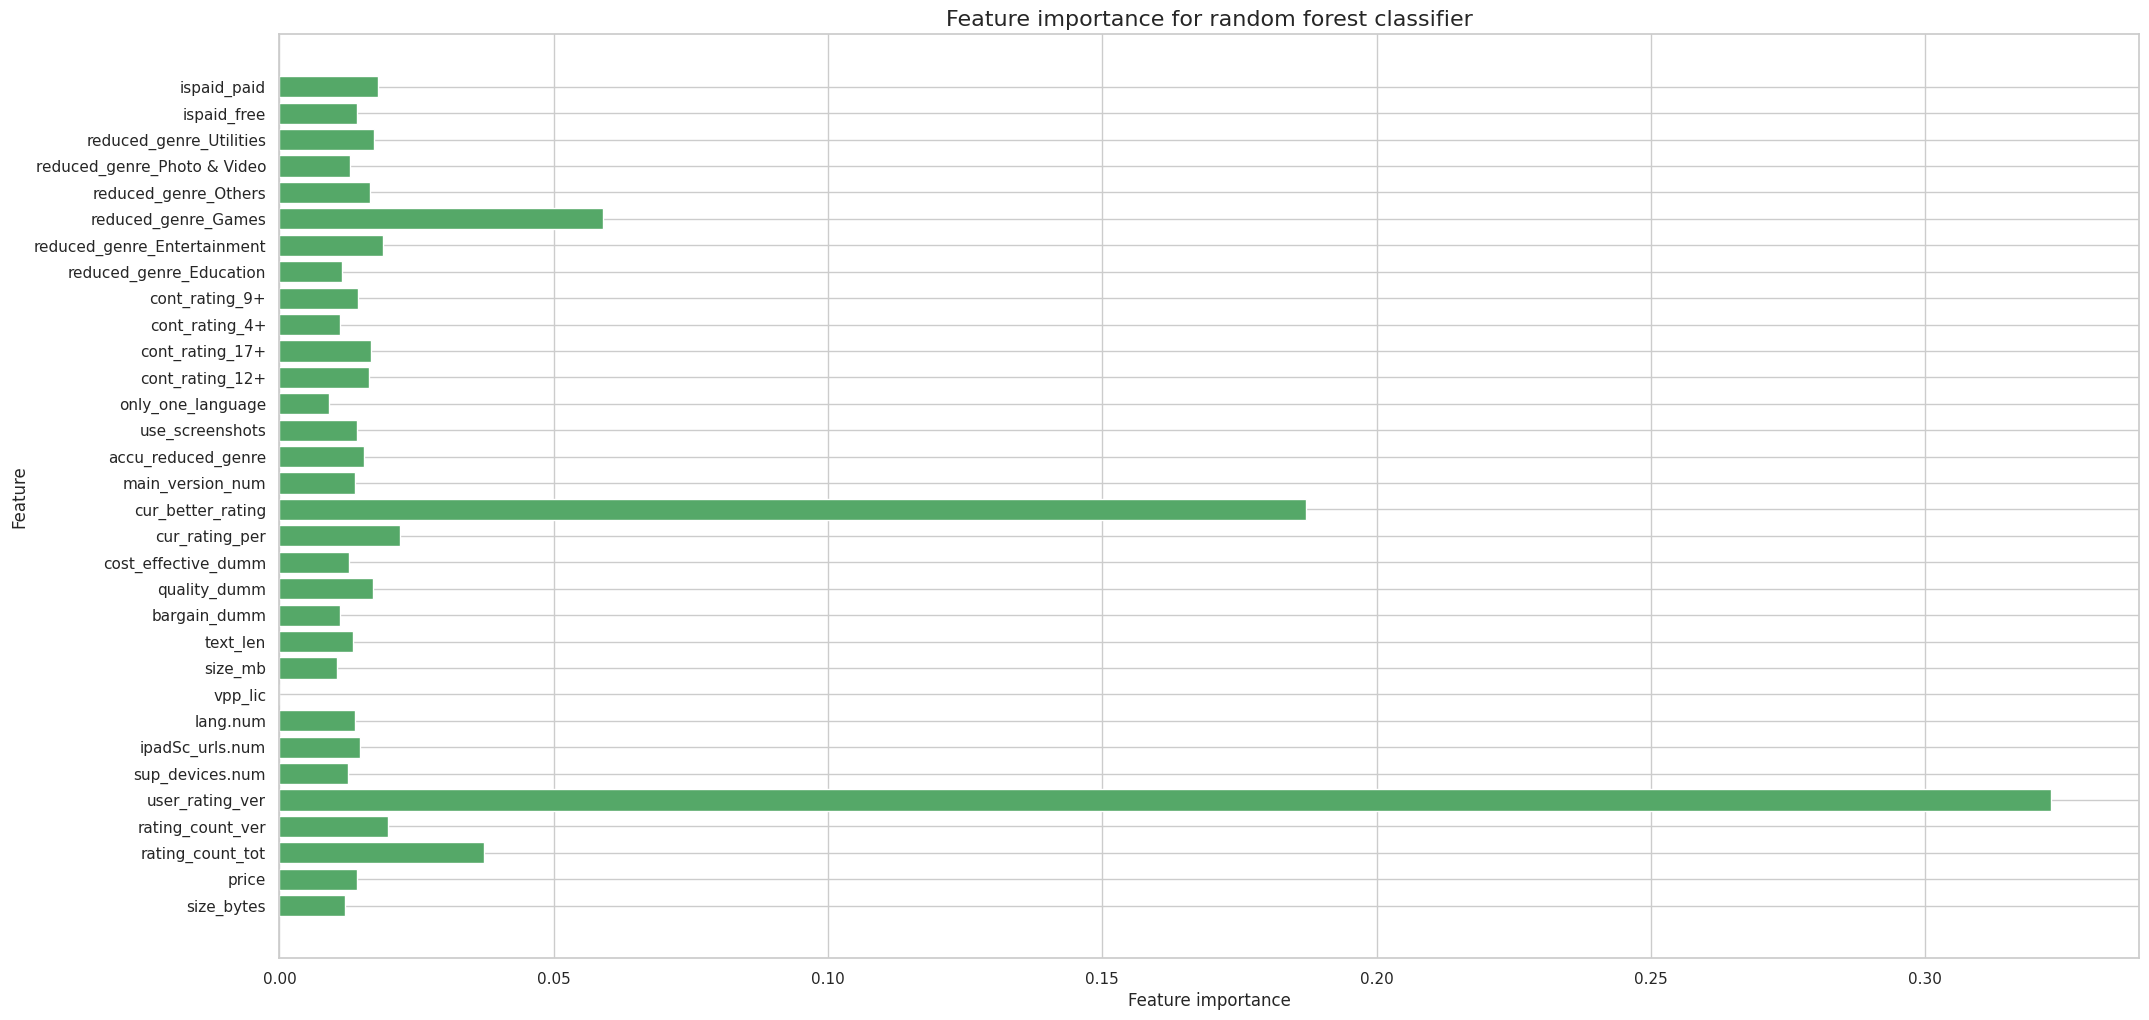

In [177]:
confusion_matrices = [
    ("XGBOOST", confusion_matrix(y_valid,grid_xgb.predict(X_valid))),
]

draw_confusion_matrices(confusion_matrices)
plot_feature_importances(model=grid_xgb.best_estimator_)

In [178]:
# Stack up all the models above, optimized using xgboost
stack_gen = StackingCVClassifier(classifiers=(grid_lr_1.best_estimator_, grid_rf.best_estimator_, grid_xgb.best_estimator_),
                                meta_classifier=XGBClassifier(eval_metric='logloss'),use_features_in_secondary=True,cv=skf,use_probas=True,random_state=1)
stack_gen_model = stack_gen.fit(np.array(X_train), np.array(y_train))

# Get final precitions from the blended model
blended_score = f1_score(y_valid, stack_gen_model.predict(np.array(X_valid)))
print("Blending prediction score on validate data {:.3f}".format(blended_score))

Blending prediction score on validate data 0.931


Stacking
Accuracy: 0.905
Precision: 0.929
Recall: 0.934


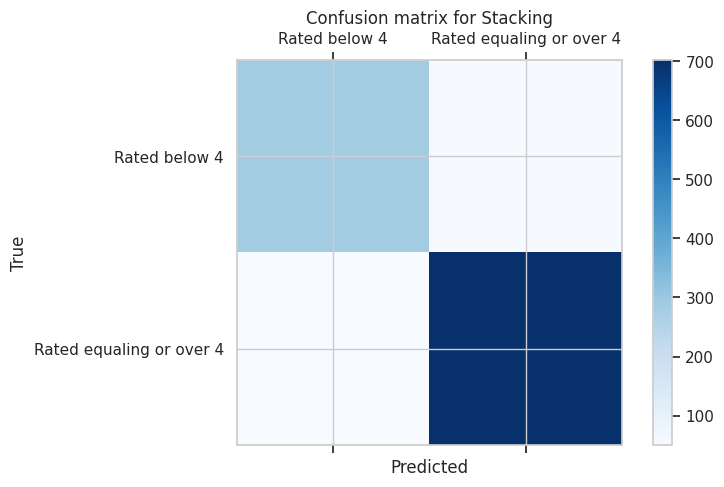

In [179]:
# confusion matrix
confusion_matrices = [
    ("Stacking", confusion_matrix(y_valid,stack_gen_model.predict(X_valid))),
]

draw_confusion_matrices(confusion_matrices)

In [181]:
# Check and convert y_test to binary if necessary
y_test_binary = np.array(y_test).astype(int)

# Ensure predictions are binary integers
y_pred = stack_gen_model.predict(np.array(X_test)).astype(int)

# Now, calculate the F1 score
test_score = f1_score(y_test_binary, y_pred)
print("Blending prediction score on test data: {:.3f}".format(test_score))


Blending prediction score on test data: 0.925
